In [1]:
# Necessary Imports
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.cluster import DBSCAN
import plotly.express as px
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, scale_x_continuous, theme


# Datasets Imports

In [2]:
df = pd.read_csv("D:/understat_per_game.csv")
df

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
0                 4       2  ...   9.625000       231       24  21.850000   
1                 1       1  ...   4.756098       195       41  17.695652   
2                 3       2  ...   5.060606       167       33  16.961538   
3                 2       0  ...   4.423077       115       26   9.446809   
4                 2       4  ...   4.250000       170       40  44.800000   
...             ...     ...  ...        ...       ...      ...        ...   
24575             6       1  ...  15.500000       310       20  19.600000   
24576             7       1  ...  12.650000       253       20  14.600000   
24577             7       3  ...  13.777778       248       18  12.888889   
24578            10       2  ...  25.454545       280       11  10.600000   
24579             6       2  ...  10.291667       247       24  16.750000   

       oppda_att  oppda_def           team   xG_diff  xGA_diff  xpts_diff  
0            437         20  Bayern Munich  0.570120  0.198420    -0.6514  
1            407         23  Bayern Munich  0.503280  0.307950     0.5143  
2            441         26  Bayern Munich -0.770130  0.310166    -0.8412  
3            444         47  Bayern Munich  1.035190  0.203118     1.1367  
4            448         10  Bayern Munich -0.517140  0.402844    -0.0713  
...          ...        ...            ...       ...       ...        ...  
24575        294         15          Lecce -0.551846 -0.412350     0.1597  
24576        292         20          Lecce  0.699320 -1.553321     2.4418  
24577        348         27          Lecce -0.464890 -0.040900    -0.5675  
24578        212         20          Lecce  0.247360 -0.310730     1.1019  
24579        268         16          Lecce -0.065160  0.554200    -1.2913  

[24580 rows x 29 columns]

# Data Cleaning

In [3]:
df.isnull().sum()

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64

# Predicted goals by a team for next match (as per every record)

In [4]:
df_every_record = df.copy()

In [5]:
ols = LinearRegression()

features = df_every_record[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']]
target = df_every_record['scored']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

ols.fit(X_train, y_train)
df_every_record['Predicted_goals'] = ols.predict(df_every_record[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']])
df_every_record

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_att  ppda_def oppda_coef oppda_att  \
0                 4       2  ...       231        24  21.850000       437   
1                 1       1  ...       195        41  17.695652       407   
2                 3       2  ...       167        33  16.961538       441   
3                 2       0  ...       115        26   9.446809       444   
4                 2       4  ...       170        40  44.800000       448   
...             ...     ...  ...       ...       ...        ...       ...   
24575             6       1  ...       310        20  19.600000       294   
24576             7       1  ...       253        20  14.600000       292   
24577             7       3  ...       248        18  12.888889       348   
24578            10       2  ...       280        11  10.600000       212   
24579             6       2  ...       247        24  16.750000       268   

       oppda_def           team   xG_diff  xGA_diff  xpts_diff  \
0             20  Bayern Munich  0.570120  0.198420    -0.6514   
1             23  Bayern Munich  0.503280  0.307950     0.5143   
2             26  Bayern Munich -0.770130  0.310166    -0.8412   
3             47  Bayern Munich  1.035190  0.203118     1.1367   
4             10  Bayern Munich -0.517140  0.402844    -0.0713   
...          ...            ...       ...       ...        ...   
24575         15          Lecce -0.551846 -0.412350     0.1597   
24576         20          Lecce  0.699320 -1.553321     2.4418   
24577         27          Lecce -0.464890 -0.040900    -0.5675   
24578         20          Lecce  0.247360 -0.310730     1.1019   
24579         16          Lecce -0.065160  0.554200    -1.2913   

       Predicted_goals  
0             2.583258  
1             1.426138  
2             1.213872  
3             1.113745  
4             3.290570  
...                ...  
24575         0.460950  
24576         1.749297  
24577         2.595488  
24578         2.121908  
24579         1.871535  

[24580 rows x 30 columns]

In [6]:
# Make predictions on the test set
y_pred = ols.predict(X_test)

# Calculate R^2 score
r2_accuracy = r2_score(y_test, y_pred)

# Alternatively, you can calculate Mean Squared Error (MSE)
mse_accuracy = mean_squared_error(y_test, y_pred)

print(f'R^2 Accuracy: {r2_accuracy:.4f}')
print(f'Mean Squared Error: {mse_accuracy:.4f}')

R^2 Accuracy: 0.4259
Mean Squared Error: 0.8774


In [7]:
mean_Predicted_goals = df_every_record.groupby('team')['Predicted_goals'].transform('mean')

df_every_record['Predicted_Goal_for_next_match_according_to_last_5_years'] = mean_Predicted_goals
df_every_record

league  year h_a        xG       xGA      npxG     npxGA  deep  \
0      Bundesliga  2014   h  2.570120  1.198420  2.570120  1.198420     5   
1      Bundesliga  2014   a  1.503280  1.307950  1.503280  1.307950    10   
2      Bundesliga  2014   h  1.229870  0.310166  1.229870  0.310166    13   
3      Bundesliga  2014   a  1.035190  0.203118  1.035190  0.203118     6   
4      Bundesliga  2014   h  3.482860  0.402844  3.482860  0.402844    23   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_def  oppda_coef oppda_att oppda_def  \
0                 4       2  ...        24   21.850000       437        20   
1                 1       1  ...        41   17.695652       407        23   
2                 3       2  ...        33   16.961538       441        26   
3                 2       0  ...        26    9.446809       444        47   
4                 2       4  ...        40   44.800000       448        10   
...             ...     ...  ...       ...         ...       ...       ...   
24575             6       1  ...        20   19.600000       294        15   
24576             7       1  ...        20   14.600000       292        20   
24577             7       3  ...        18   12.888889       348        27   
24578            10       2  ...        11   10.600000       212        20   
24579             6       2  ...        24   16.750000       268        16   

                team   xG_diff  xGA_diff  xpts_diff  Predicted_goals  \
0      Bayern Munich  0.570120  0.198420    -0.6514         2.583258   
1      Bayern Munich  0.503280  0.307950     0.5143         1.426138   
2      Bayern Munich -0.770130  0.310166    -0.8412         1.213872   
3      Bayern Munich  1.035190  0.203118     1.1367         1.113745   
4      Bayern Munich -0.517140  0.402844    -0.0713         3.290570   
...              ...       ...       ...        ...              ...   
24575          Lecce -0.551846 -0.412350     0.1597         0.460950   
24576          Lecce  0.699320 -1.553321     2.4418         1.749297   
24577          Lecce -0.464890 -0.040900    -0.5675         2.595488   
24578          Lecce  0.247360 -0.310730     1.1019         2.121908   
24579          Lecce -0.065160  0.554200    -1.2913         1.871535   

       Predicted_Goal_for_next_match_according_to_last_5_years  
0                                               2.295273        
1                                               2.295273        
2                                               2.295273        
3                                               2.295273        
4                                               2.295273        
...                                                  ...        
24575                                           1.356527        
24576                                           1.356527        
24577                                           1.356527        
24578                                           1.356527        
24579                                           1.356527        

[24580 rows x 31 columns]

In [8]:
len(df_every_record['Predicted_Goal_for_next_match_according_to_last_5_years'].unique())

168

In [9]:
len(df_every_record['team'].unique())

168

In [10]:
teams_vs_expected_goals_according_to_last_5_years = df_every_record.groupby('team').agg({
    'Predicted_Goal_for_next_match_according_to_last_5_years' : 'first'
})

In [11]:
teams_vs_expected_goals_according_to_last_5_years

Predicted_Goal_for_next_match_according_to_last_5_years
team                                                                            
AC Milan                                                          1.466326      
Alaves                                                            1.126676      
Almeria                                                           1.052222      
Amiens                                                            0.950981      
Amkar                                                             0.863995      
...                                                                    ...      
West Bromwich Albion                                              1.067674      
West Ham                                                          1.277531      
Wolfsburg                                                         1.450601      
Wolverhampton Wanderers                                           1.469862      
Zenit St. Petersburg                                              1.727882      

[168 rows x 1 columns]

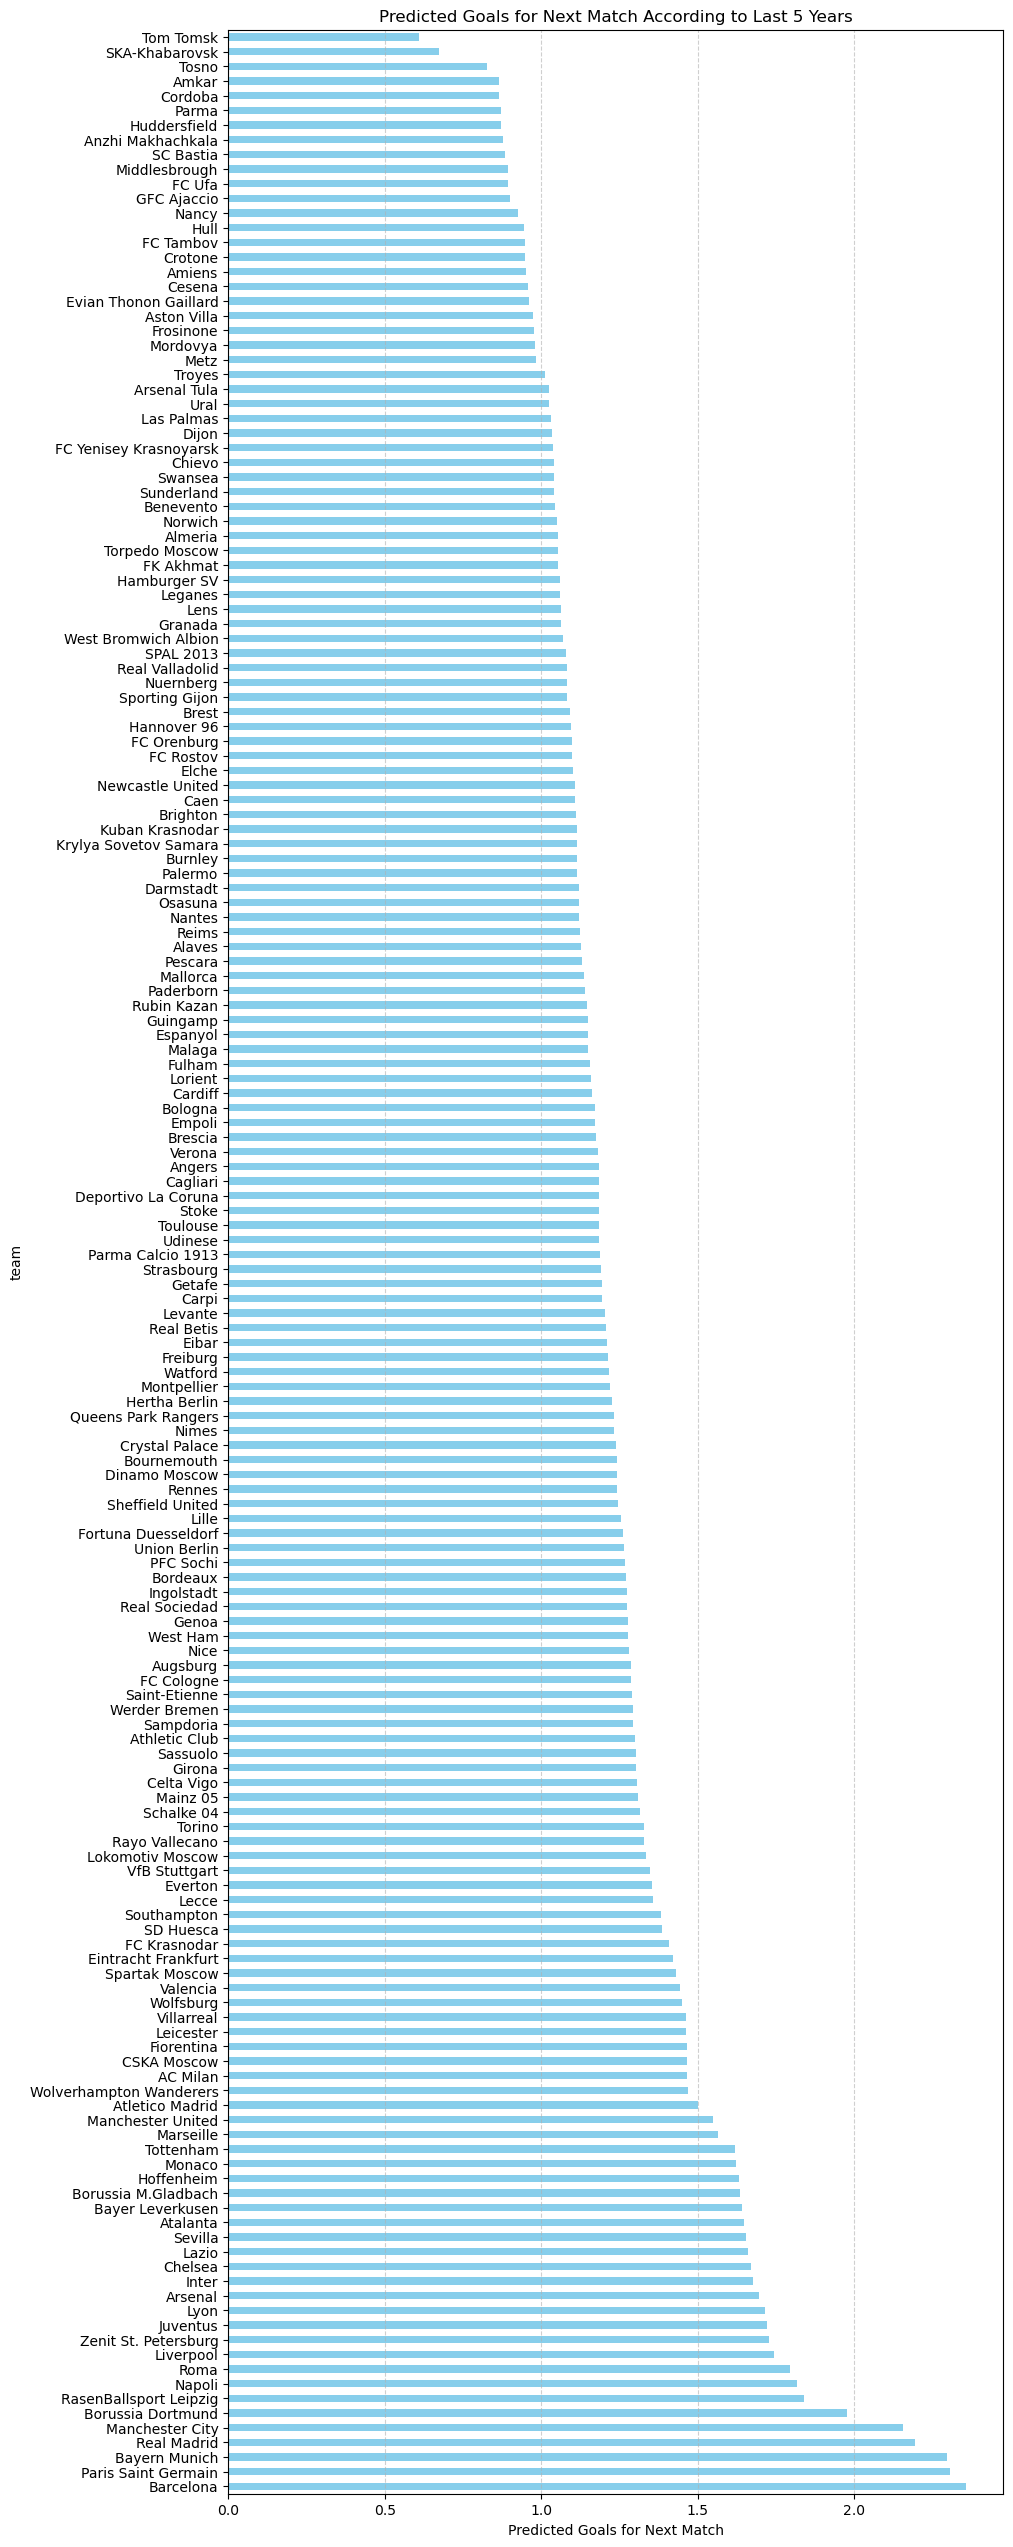

In [12]:
# Sort the DataFrame by predicted goals for better visualization
predicted_goals_df = teams_vs_expected_goals_according_to_last_5_years.sort_values(by='Predicted_Goal_for_next_match_according_to_last_5_years', ascending=False)

# Plotting
plt.figure(figsize=(10, 32))
predicted_goals_df['Predicted_Goal_for_next_match_according_to_last_5_years'].plot(kind='barh', color='skyblue')
plt.xlabel('Predicted Goals for Next Match')
plt.title('Predicted Goals for Next Match According to Last 5 Years')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Predicted goals by a team for next match (as per aggregated mean values)

In [13]:
aggregated_df = df[['team','xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored']]
aggregated_df

team        xG       xGA      npxG     npxGA  deep  \
0      Bayern Munich  2.570120  1.198420  2.570120  1.198420     5   
1      Bayern Munich  1.503280  1.307950  1.503280  1.307950    10   
2      Bayern Munich  1.229870  0.310166  1.229870  0.310166    13   
3      Bayern Munich  1.035190  0.203118  1.035190  0.203118     6   
4      Bayern Munich  3.482860  0.402844  3.482860  0.402844    23   
...              ...       ...       ...       ...       ...   ...   
24575          Lecce  0.448154  2.587650  0.448154  1.826350     7   
24576          Lecce  1.699320  0.446679  0.938022  0.446679     5   
24577          Lecce  2.535110  0.959100  2.535110  0.959100     5   
24578          Lecce  2.247360  2.689270  2.247360  2.689270    11   
24579          Lecce  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  
0                 4       2  
1                 1       1  
2                 3       2  
3                 2       0  
4                 2       4  
...             ...     ...  
24575             6       1  
24576             7       1  
24577             7       3  
24578            10       2  
24579             6       2  

[24580 rows x 8 columns]

In [14]:
aggregated_df = aggregated_df.groupby('team').agg({
    'xG' : 'mean',
    'xGA' : 'mean',
    'npxG' : 'mean',
    'npxGA' : 'mean',
    'deep' : 'mean',
    'deep_allowed' : 'mean',
    'scored' : 'mean'
})
aggregated_df

xG       xGA      npxG     npxGA      deep  \
team                                                                        
AC Milan                 1.442802  1.184224  1.279048  1.055595  6.473684   
Alaves                   1.049347  1.412049  0.971111  1.231123  3.309211   
Almeria                  1.017630  1.549126  0.900270  1.510007  3.578947   
Amiens                   0.881886  1.316153  0.792976  1.213833  3.480769   
Amkar                    0.779252  1.053796  0.697386  0.920638  4.316667   
...                           ...       ...       ...       ...       ...   
West Bromwich Albion     0.998544  1.332760  0.938335  1.247629  3.960526   
West Ham                 1.241949  1.600467  1.164225  1.472517  5.464912   
Wolfsburg                1.413397  1.316006  1.319580  1.202747  5.044118   
Wolverhampton Wanderers  1.411614  1.053692  1.331491  0.981680  4.684211   
Zenit St. Petersburg     1.726253  0.750174  1.550255  0.699385  8.761111   

                         deep_allowed    scored  
team                                             
AC Milan                     5.390351  1.473684  
Alaves                       6.677632  1.013158  
Almeria                      5.789474  0.921053  
Amiens                       6.125000  0.951923  
Amkar                        6.166667  0.766667  
...                               ...       ...  
West Bromwich Albion         7.085526  0.960526  
West Ham                     7.815789  1.337719  
Wolfsburg                    5.504902  1.465686  
Wolverhampton Wanderers      5.434211  1.289474  
Zenit St. Petersburg         4.083333  1.872222  

[168 rows x 7 columns]

In [15]:
x = aggregated_df[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']]
y = aggregated_df['scored']

X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)
ols.fit(X_train1, y_train1)
aggregated_df['Predicted_goals_aggregated_5_years'] = ols.predict(aggregated_df[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']])
aggregated_df

xG       xGA      npxG     npxGA      deep  \
team                                                                        
AC Milan                 1.442802  1.184224  1.279048  1.055595  6.473684   
Alaves                   1.049347  1.412049  0.971111  1.231123  3.309211   
Almeria                  1.017630  1.549126  0.900270  1.510007  3.578947   
Amiens                   0.881886  1.316153  0.792976  1.213833  3.480769   
Amkar                    0.779252  1.053796  0.697386  0.920638  4.316667   
...                           ...       ...       ...       ...       ...   
West Bromwich Albion     0.998544  1.332760  0.938335  1.247629  3.960526   
West Ham                 1.241949  1.600467  1.164225  1.472517  5.464912   
Wolfsburg                1.413397  1.316006  1.319580  1.202747  5.044118   
Wolverhampton Wanderers  1.411614  1.053692  1.331491  0.981680  4.684211   
Zenit St. Petersburg     1.726253  0.750174  1.550255  0.699385  8.761111   

                         deep_allowed    scored  \
team                                              
AC Milan                     5.390351  1.473684   
Alaves                       6.677632  1.013158   
Almeria                      5.789474  0.921053   
Amiens                       6.125000  0.951923   
Amkar                        6.166667  0.766667   
...                               ...       ...   
West Bromwich Albion         7.085526  0.960526   
West Ham                     7.815789  1.337719   
Wolfsburg                    5.504902  1.465686   
Wolverhampton Wanderers      5.434211  1.289474   
Zenit St. Petersburg         4.083333  1.872222   

                         Predicted_goals_aggregated_5_years  
team                                                         
AC Milan                                           1.512980  
Alaves                                             1.040264  
Almeria                                            0.927903  
Amiens                                             0.852445  
Amkar                                              0.817094  
...                                                     ...  
West Bromwich Albion                               0.960377  
West Ham                                           1.208485  
Wolfsburg                                          1.426203  
Wolverhampton Wanderers                            1.438623  
Zenit St. Petersburg                               1.874129  

[168 rows x 8 columns]

In [16]:
# Make predictions on the test set
y_pred = ols.predict(X_test1)

# Calculate R^2 score
r2_accuracy = r2_score(y_test1, y_pred)

# Alternatively, you can calculate Mean Squared Error (MSE)
mse_accuracy = mean_squared_error(y_test1, y_pred)

print(f'R^2 Accuracy: {r2_accuracy:.4f}')
print(f'Mean Squared Error: {mse_accuracy:.4f}')

R^2 Accuracy: 0.9156
Mean Squared Error: 0.0116


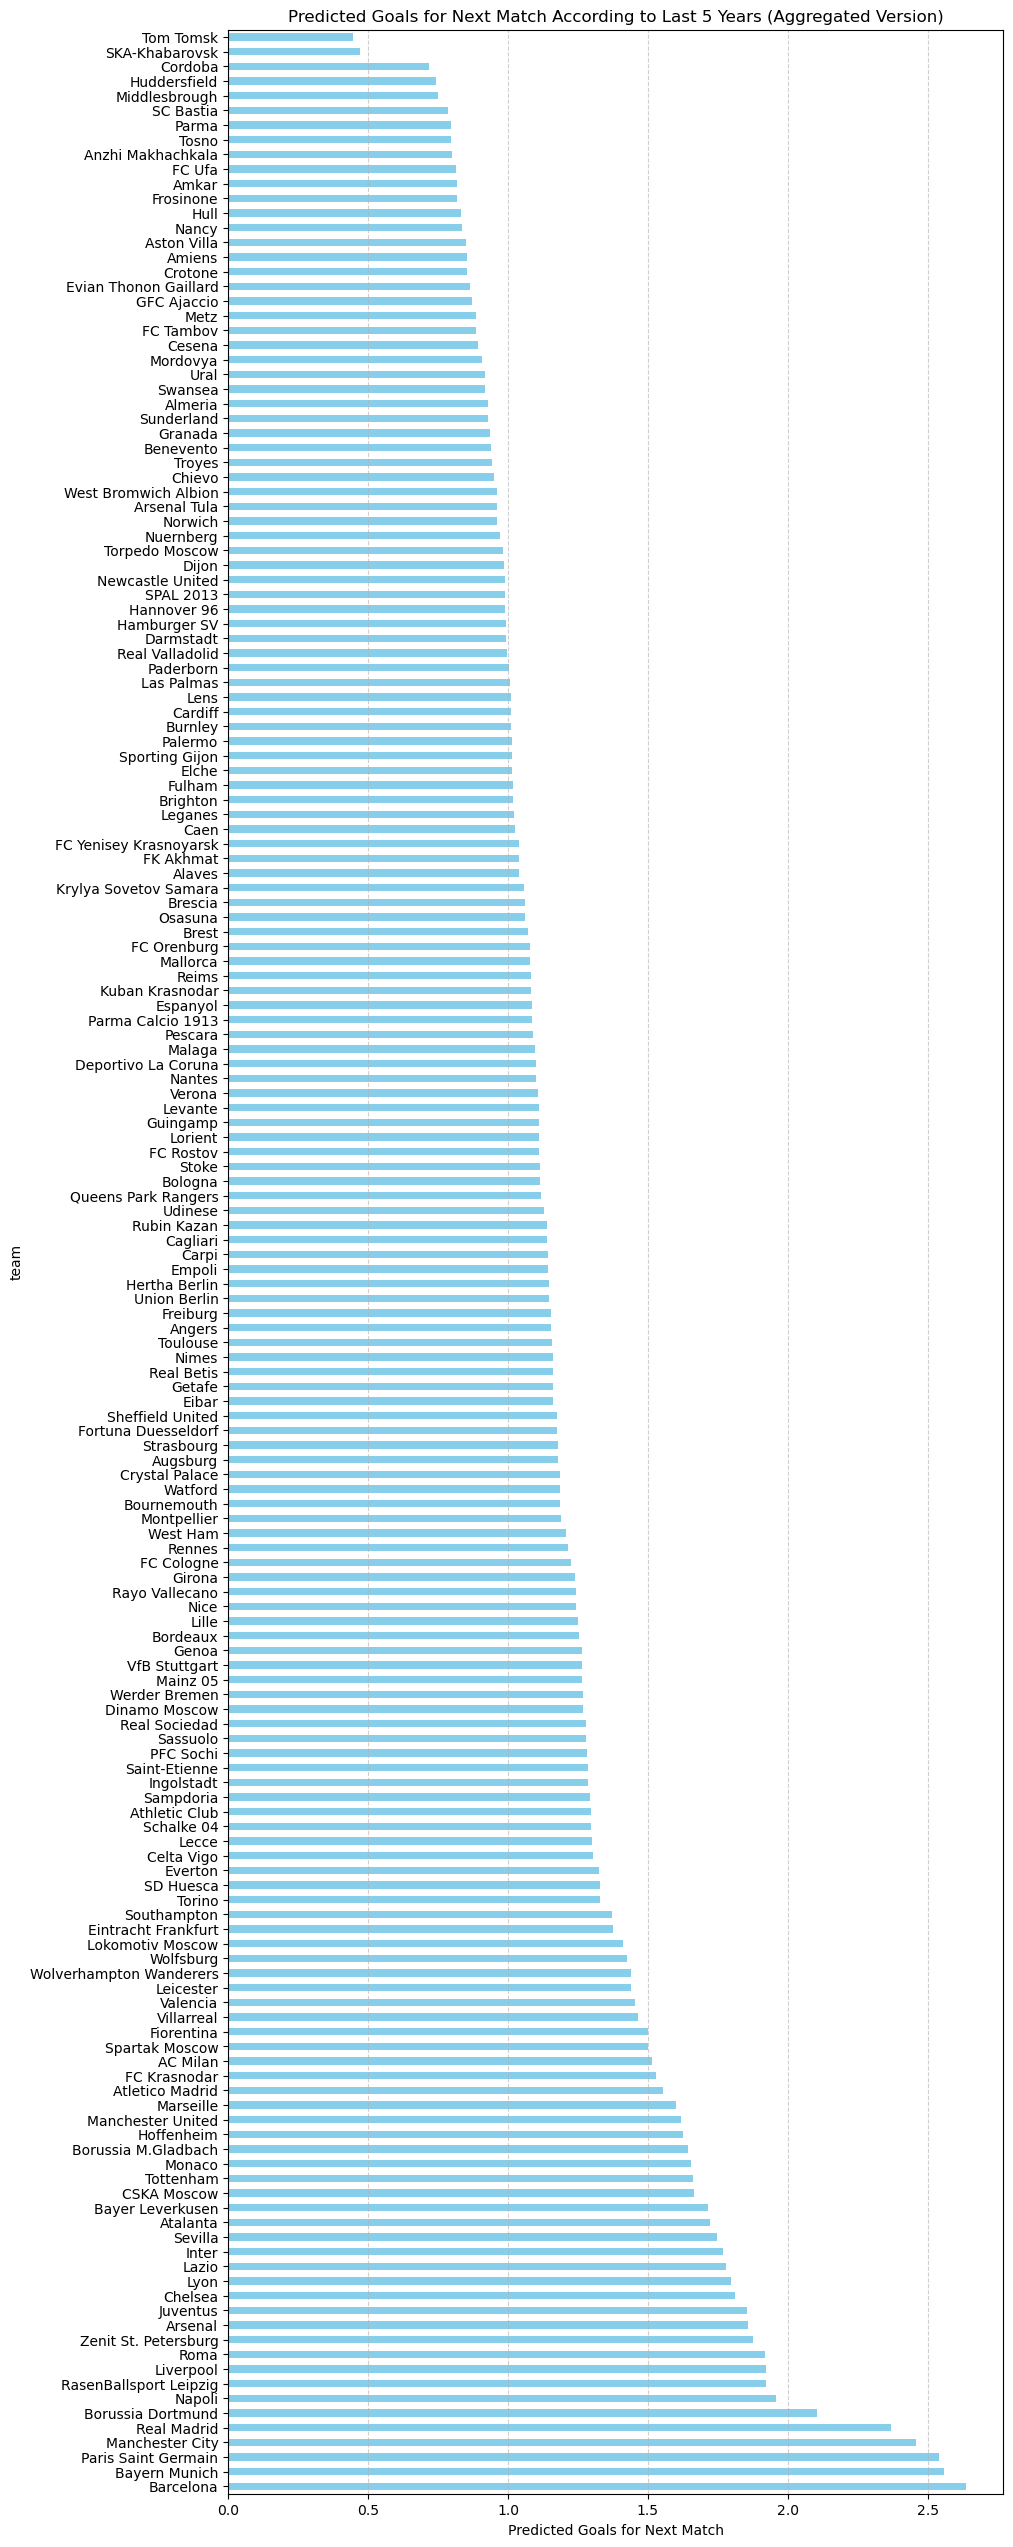

In [17]:
# Sort the DataFrame by predicted goals for better visualization
predicted_goals_df1 = aggregated_df.sort_values(by='Predicted_goals_aggregated_5_years', ascending=False)

# Plotting
plt.figure(figsize=(10, 32))
predicted_goals_df1['Predicted_goals_aggregated_5_years'].plot(kind='barh', color='skyblue')
plt.xlabel('Predicted Goals for Next Match')
plt.title('Predicted Goals for Next Match According to Last 5 Years (Aggregated Version)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Predicted Goals as per Last Season (without aggregation)

In [18]:
df.max()

league                       Serie_A
year                            2019
h_a                                h
xG                           6.63049
xGA                          6.63049
npxG                         6.61091
npxGA                        6.61091
deep                              42
deep_allowed                      42
scored                            10
missed                            10
xpts                             3.0
result                             w
date             2020-08-01 18:45:00
wins                               1
draws                              1
loses                              1
pts                                3
npxGD                       6.007965
ppda_coef                      152.0
ppda_att                         764
ppda_def                          65
oppda_coef                     152.0
oppda_att                        764
oppda_def                         65
team            Zenit St. Petersburg
xG_diff                      5.06313
x

In [19]:
df_last_season = df[df['year'] == 2019]
df_last_season

league  year h_a        xG       xGA      npxG     npxGA  deep  \
3060   Bundesliga  2019   h  2.477070  1.184590  1.719290  1.184590    17   
3061   Bundesliga  2019   a  1.597290  1.080160  0.839510  1.080160     9   
3062   Bundesliga  2019   h  3.345970  0.720470  3.345970  0.720470     8   
3063   Bundesliga  2019   a  1.670400  1.654270  1.670400  0.896496    10   
3064   Bundesliga  2019   h  2.923510  1.032670  2.165730  1.032670    12   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
3060              2       2  ...  10.500000       168       16  16.217391   
3061              6       3  ...   9.684211       184       19  18.280000   
3062              2       6  ...   5.354839       166       31  20.350000   
3063              7       1  ...   9.142857       192       21  17.178571   
3064              7       4  ...   7.920000       198       25  14.500000   
...             ...     ...  ...        ...       ...      ...        ...   
24575             6       1  ...  15.500000       310       20  19.600000   
24576             7       1  ...  12.650000       253       20  14.600000   
24577             7       3  ...  13.777778       248       18  12.888889   
24578            10       2  ...  25.454545       280       11  10.600000   
24579             6       2  ...  10.291667       247       24  16.750000   

       oppda_att  oppda_def           team   xG_diff  xGA_diff  xpts_diff  
3060         373         23  Bayern Munich  0.477070 -0.815410     1.3576  
3061         457         25  Bayern Munich -1.402710  1.080160    -1.1731  
3062         407         20  Bayern Munich -2.654030 -0.279530    -0.1852  
3063         481         28  Bayern Munich  0.670400  0.654270     0.3717  
3064         319         22  Bayern Munich -1.076490  1.032670    -0.4544  
...          ...        ...            ...       ...       ...        ...  
24575        294         15          Lecce -0.551846 -0.412350     0.1597  
24576        292         20          Lecce  0.699320 -1.553321     2.4418  
24577        348         27          Lecce -0.464890 -0.040900    -0.5675  
24578        212         20          Lecce  0.247360 -0.310730     1.1019  
24579        268         16          Lecce -0.065160  0.554200    -1.2913  

[3920 rows x 29 columns]

In [20]:
x1 = df_last_season[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']]
y1 = df_last_season['scored']

X_train2, X_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.2, random_state=42)
ols.fit(X_train2, y_train2)
df_last_season['Predicted_goals_according_to_last_season'] = ols.predict(df_last_season[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']])
df_last_season

C:\Users\Dell\AppData\Local\Temp\ipykernel_21756\2905940271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


league  year h_a        xG       xGA      npxG     npxGA  deep  \
3060   Bundesliga  2019   h  2.477070  1.184590  1.719290  1.184590    17   
3061   Bundesliga  2019   a  1.597290  1.080160  0.839510  1.080160     9   
3062   Bundesliga  2019   h  3.345970  0.720470  3.345970  0.720470     8   
3063   Bundesliga  2019   a  1.670400  1.654270  1.670400  0.896496    10   
3064   Bundesliga  2019   h  2.923510  1.032670  2.165730  1.032670    12   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_att  ppda_def oppda_coef oppda_att  \
3060              2       2  ...       168        16  16.217391       373   
3061              6       3  ...       184        19  18.280000       457   
3062              2       6  ...       166        31  20.350000       407   
3063              7       1  ...       192        21  17.178571       481   
3064              7       4  ...       198        25  14.500000       319   
...             ...     ...  ...       ...       ...        ...       ...   
24575             6       1  ...       310        20  19.600000       294   
24576             7       1  ...       253        20  14.600000       292   
24577             7       3  ...       248        18  12.888889       348   
24578            10       2  ...       280        11  10.600000       212   
24579             6       2  ...       247        24  16.750000       268   

       oppda_def           team   xG_diff  xGA_diff  xpts_diff  \
3060          23  Bayern Munich  0.477070 -0.815410     1.3576   
3061          25  Bayern Munich -1.402710  1.080160    -1.1731   
3062          20  Bayern Munich -2.654030 -0.279530    -0.1852   
3063          28  Bayern Munich  0.670400  0.654270     0.3717   
3064          22  Bayern Munich -1.076490  1.032670    -0.4544   
...          ...            ...       ...       ...        ...   
24575         15          Lecce -0.551846 -0.412350     0.1597   
24576         20          Lecce  0.699320 -1.553321     2.4418   
24577         27          Lecce -0.464890 -0.040900    -0.5675   
24578         20          Lecce  0.247360 -0.310730     1.1019   
24579         16          Lecce -0.065160  0.554200    -1.2913   

       Predicted_goals_according_to_last_season  
3060                                   2.266572  
3061                                   1.570698  
3062                                   3.173652  
3063                                   1.626770  
3064                                   2.787792  
...                                         ...  
24575                                  0.431408  
24576                                  1.760541  
24577                                  2.485569  
24578                                  2.062760  
24579                                  1.865717  

[3920 rows x 30 columns]

In [21]:
# Make predictions on the test set
y_pred = ols.predict(X_test2)

# Calculate R^2 score
r2_accuracy = r2_score(y_test2, y_pred)

# Alternatively, you can calculate Mean Squared Error (MSE)
mse_accuracy = mean_squared_error(y_test2, y_pred)

print(f'R^2 Accuracy: {r2_accuracy:.4f}')
print(f'Mean Squared Error: {mse_accuracy:.4f}')

R^2 Accuracy: 0.4253
Mean Squared Error: 0.9439


In [22]:
mean_Predicted_goals_last_season = df_every_record.groupby('team')['Predicted_goals'].transform('mean')

df_last_season['Average_Predicted_goals_according_to_last_season'] = mean_Predicted_goals_last_season
df_last_season

C:\Users\Dell\AppData\Local\Temp\ipykernel_21756\3704201592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


league  year h_a        xG       xGA      npxG     npxGA  deep  \
3060   Bundesliga  2019   h  2.477070  1.184590  1.719290  1.184590    17   
3061   Bundesliga  2019   a  1.597290  1.080160  0.839510  1.080160     9   
3062   Bundesliga  2019   h  3.345970  0.720470  3.345970  0.720470     8   
3063   Bundesliga  2019   a  1.670400  1.654270  1.670400  0.896496    10   
3064   Bundesliga  2019   h  2.923510  1.032670  2.165730  1.032670    12   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_def  oppda_coef oppda_att oppda_def  \
3060              2       2  ...        16   16.217391       373        23   
3061              6       3  ...        19   18.280000       457        25   
3062              2       6  ...        31   20.350000       407        20   
3063              7       1  ...        21   17.178571       481        28   
3064              7       4  ...        25   14.500000       319        22   
...             ...     ...  ...       ...         ...       ...       ...   
24575             6       1  ...        20   19.600000       294        15   
24576             7       1  ...        20   14.600000       292        20   
24577             7       3  ...        18   12.888889       348        27   
24578            10       2  ...        11   10.600000       212        20   
24579             6       2  ...        24   16.750000       268        16   

                team   xG_diff  xGA_diff  xpts_diff  \
3060   Bayern Munich  0.477070 -0.815410     1.3576   
3061   Bayern Munich -1.402710  1.080160    -1.1731   
3062   Bayern Munich -2.654030 -0.279530    -0.1852   
3063   Bayern Munich  0.670400  0.654270     0.3717   
3064   Bayern Munich -1.076490  1.032670    -0.4544   
...              ...       ...       ...        ...   
24575          Lecce -0.551846 -0.412350     0.1597   
24576          Lecce  0.699320 -1.553321     2.4418   
24577          Lecce -0.464890 -0.040900    -0.5675   
24578          Lecce  0.247360 -0.310730     1.1019   
24579          Lecce -0.065160  0.554200    -1.2913   

       Predicted_goals_according_to_last_season  \
3060                                   2.266572   
3061                                   1.570698   
3062                                   3.173652   
3063                                   1.626770   
3064                                   2.787792   
...                                         ...   
24575                                  0.431408   
24576                                  1.760541   
24577                                  2.485569   
24578                                  2.062760   
24579                                  1.865717   

       Average_Predicted_goals_according_to_last_season  
3060                                           2.295273  
3061                                           2.295273  
3062                                           2.295273  
3063                                           2.295273  
3064                                           2.295273  
...                                                 ...  
24575                                          1.356527  
24576                                          1.356527  
24577                                          1.356527  
24578                                          1.356527  
24579                                          1.356527  

[3920 rows x 31 columns]

In [23]:
teams_vs_expected_goals_according_to_last_season = df_last_season.groupby('team').agg({
    'Average_Predicted_goals_according_to_last_season' : 'first'
})
teams_vs_expected_goals_according_to_last_season

Average_Predicted_goals_according_to_last_season
team                                                                     
AC Milan                                                         1.466326
Alaves                                                           1.126676
Amiens                                                           0.950981
Angers                                                           1.183291
Arsenal                                                          1.694759
...                                                                   ...
Werder Bremen                                                    1.291856
West Ham                                                         1.277531
Wolfsburg                                                        1.450601
Wolverhampton Wanderers                                          1.469862
Zenit St. Petersburg                                             1.727882

[114 rows x 1 columns]

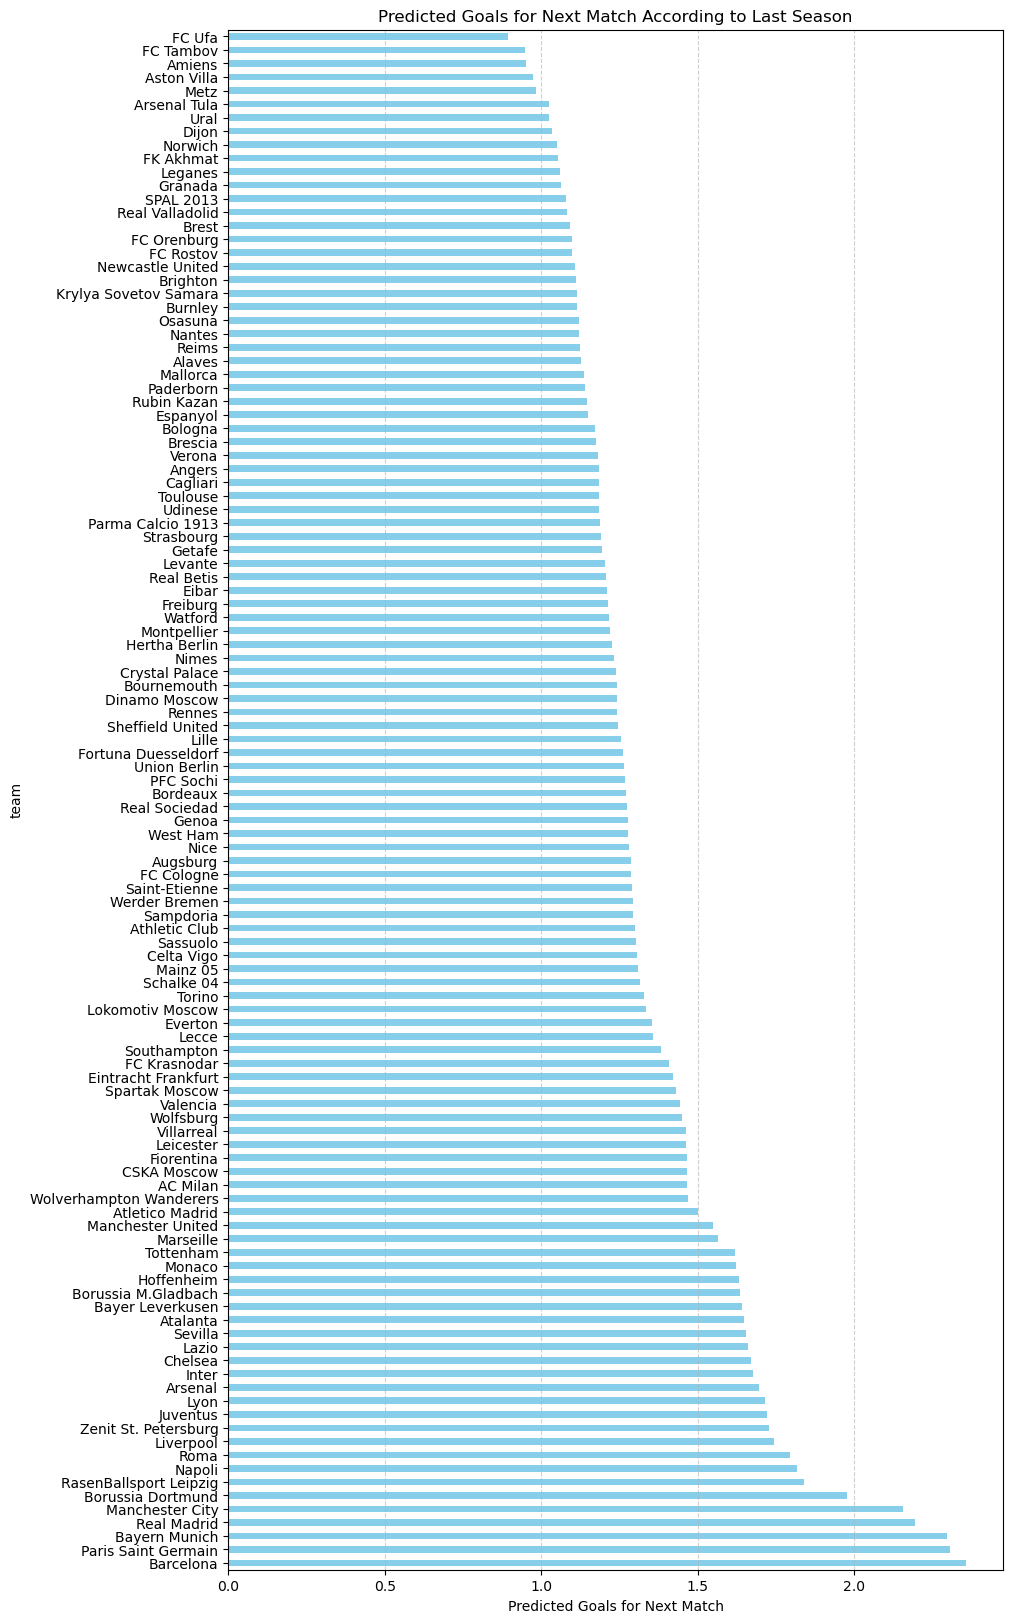

In [24]:
# Sort the DataFrame by predicted goals for better visualization
predicted_goals_df2 = teams_vs_expected_goals_according_to_last_season.sort_values(by='Average_Predicted_goals_according_to_last_season', ascending=False)

# Plotting
plt.figure(figsize=(10, 20))
predicted_goals_df2['Average_Predicted_goals_according_to_last_season'].plot(kind='barh', color='skyblue')
plt.xlabel('Predicted Goals for Next Match')
plt.title('Predicted Goals for Next Match According to Last Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Predicted Goals as per Last Season (Aggregated)

In [25]:
aggregated_df_last_season = df[df['year'] == 2019]
aggregated_df_last_season

league  year h_a        xG       xGA      npxG     npxGA  deep  \
3060   Bundesliga  2019   h  2.477070  1.184590  1.719290  1.184590    17   
3061   Bundesliga  2019   a  1.597290  1.080160  0.839510  1.080160     9   
3062   Bundesliga  2019   h  3.345970  0.720470  3.345970  0.720470     8   
3063   Bundesliga  2019   a  1.670400  1.654270  1.670400  0.896496    10   
3064   Bundesliga  2019   h  2.923510  1.032670  2.165730  1.032670    12   
...           ...   ...  ..       ...       ...       ...       ...   ...   
24575     Serie_A  2019   h  0.448154  2.587650  0.448154  1.826350     7   
24576     Serie_A  2019   a  1.699320  0.446679  0.938022  0.446679     5   
24577     Serie_A  2019   h  2.535110  0.959100  2.535110  0.959100     5   
24578     Serie_A  2019   a  2.247360  2.689270  2.247360  2.689270    11   
24579     Serie_A  2019   a  1.934840  1.554200  1.173540  1.554200     6   

       deep_allowed  scored  ...  ppda_coef  ppda_att ppda_def oppda_coef  \
3060              2       2  ...  10.500000       168       16  16.217391   
3061              6       3  ...   9.684211       184       19  18.280000   
3062              2       6  ...   5.354839       166       31  20.350000   
3063              7       1  ...   9.142857       192       21  17.178571   
3064              7       4  ...   7.920000       198       25  14.500000   
...             ...     ...  ...        ...       ...      ...        ...   
24575             6       1  ...  15.500000       310       20  19.600000   
24576             7       1  ...  12.650000       253       20  14.600000   
24577             7       3  ...  13.777778       248       18  12.888889   
24578            10       2  ...  25.454545       280       11  10.600000   
24579             6       2  ...  10.291667       247       24  16.750000   

       oppda_att  oppda_def           team   xG_diff  xGA_diff  xpts_diff  
3060         373         23  Bayern Munich  0.477070 -0.815410     1.3576  
3061         457         25  Bayern Munich -1.402710  1.080160    -1.1731  
3062         407         20  Bayern Munich -2.654030 -0.279530    -0.1852  
3063         481         28  Bayern Munich  0.670400  0.654270     0.3717  
3064         319         22  Bayern Munich -1.076490  1.032670    -0.4544  
...          ...        ...            ...       ...       ...        ...  
24575        294         15          Lecce -0.551846 -0.412350     0.1597  
24576        292         20          Lecce  0.699320 -1.553321     2.4418  
24577        348         27          Lecce -0.464890 -0.040900    -0.5675  
24578        212         20          Lecce  0.247360 -0.310730     1.1019  
24579        268         16          Lecce -0.065160  0.554200    -1.2913  

[3920 rows x 29 columns]

In [26]:
aggregated_df_last_season = aggregated_df_last_season.groupby('team').agg({
    'xG' : 'mean',
    'xGA' : 'mean',
    'npxG' : 'mean',
    'npxGA' : 'mean',
    'deep' : 'mean',
    'deep_allowed' : 'mean',
    'scored' : 'mean'
})
aggregated_df_last_season

xG       xGA      npxG     npxGA       deep  \
team                                                                         
AC Milan                 1.717546  1.221466  1.537241  1.014226   8.500000   
Alaves                   1.003870  1.524465  0.886521  1.231076   3.421053   
Amiens                   0.914995  1.372365  0.774785  1.345219   3.607143   
Angers                   0.968008  1.005290  0.940861  0.923852   4.714286   
Arsenal                  1.337427  1.506639  1.277337  1.342305   6.973684   
...                           ...       ...       ...       ...        ...   
Werder Bremen            1.109945  1.674702  0.976225  1.652414   5.470588   
West Ham                 1.291292  1.797982  1.211169  1.677798   5.710526   
Wolfsburg                1.600985  1.232545  1.511835  1.121115   5.647059   
Wolverhampton Wanderers  1.426947  0.983928  1.346824  0.920028   4.526316   
Zenit St. Petersburg     2.079738  0.833709  1.803170  0.730120  12.400000   

                         deep_allowed    scored  
team                                             
AC Milan                     4.789474  1.657895  
Alaves                       5.789474  0.894737  
Amiens                       5.285714  1.107143  
Angers                       4.178571  1.000000  
Arsenal                      6.657895  1.473684  
...                               ...       ...  
Werder Bremen                6.029412  1.235294  
West Ham                     8.105263  1.289474  
Wolfsburg                    5.029412  1.411765  
Wolverhampton Wanderers      5.078947  1.342105  
Zenit St. Petersburg         4.700000  2.166667  

[114 rows x 7 columns]

In [27]:
x2 = aggregated_df_last_season[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']]
y2 = aggregated_df_last_season['scored']

X_train3, X_test3, y_train3, y_test3 = train_test_split(x2, y2, test_size=0.2, random_state=42)
ols.fit(X_train3, y_train3)
aggregated_df_last_season['Aggregated_Predicted_goals_according_to_last_season'] = ols.predict(aggregated_df_last_season[['xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed']])
aggregated_df_last_season

xG       xGA      npxG     npxGA       deep  \
team                                                                         
AC Milan                 1.717546  1.221466  1.537241  1.014226   8.500000   
Alaves                   1.003870  1.524465  0.886521  1.231076   3.421053   
Amiens                   0.914995  1.372365  0.774785  1.345219   3.607143   
Angers                   0.968008  1.005290  0.940861  0.923852   4.714286   
Arsenal                  1.337427  1.506639  1.277337  1.342305   6.973684   
...                           ...       ...       ...       ...        ...   
Werder Bremen            1.109945  1.674702  0.976225  1.652414   5.470588   
West Ham                 1.291292  1.797982  1.211169  1.677798   5.710526   
Wolfsburg                1.600985  1.232545  1.511835  1.121115   5.647059   
Wolverhampton Wanderers  1.426947  0.983928  1.346824  0.920028   4.526316   
Zenit St. Petersburg     2.079738  0.833709  1.803170  0.730120  12.400000   

                         deep_allowed    scored  \
team                                              
AC Milan                     4.789474  1.657895   
Alaves                       5.789474  0.894737   
Amiens                       5.285714  1.107143   
Angers                       4.178571  1.000000   
Arsenal                      6.657895  1.473684   
...                               ...       ...   
Werder Bremen                6.029412  1.235294   
West Ham                     8.105263  1.289474   
Wolfsburg                    5.029412  1.411765   
Wolverhampton Wanderers      5.078947  1.342105   
Zenit St. Petersburg         4.700000  2.166667   

                         Aggregated_Predicted_goals_according_to_last_season  
team                                                                          
AC Milan                                                          1.761059    
Alaves                                                            0.968609    
Amiens                                                            0.852162    
Angers                                                            0.963121    
Arsenal                                                           1.354526    
...                                                                    ...    
Werder Bremen                                                     1.068612    
West Ham                                                          1.263795    
Wolfsburg                                                         1.592450    
Wolverhampton Wanderers                                           1.402160    
Zenit St. Petersburg                                              2.176894    

[114 rows x 8 columns]

In [28]:
# Make predictions on the test set
y_pred = ols.predict(X_test3)

# Calculate R^2 score
r2_accuracy = r2_score(y_test3, y_pred)

# Alternatively, you can calculate Mean Squared Error (MSE)
mse_accuracy = mean_squared_error(y_test3, y_pred)

print(f'R^2 Accuracy: {r2_accuracy:.4f}')
print(f'Mean Squared Error: {mse_accuracy:.4f}')

R^2 Accuracy: 0.8850
Mean Squared Error: 0.0165


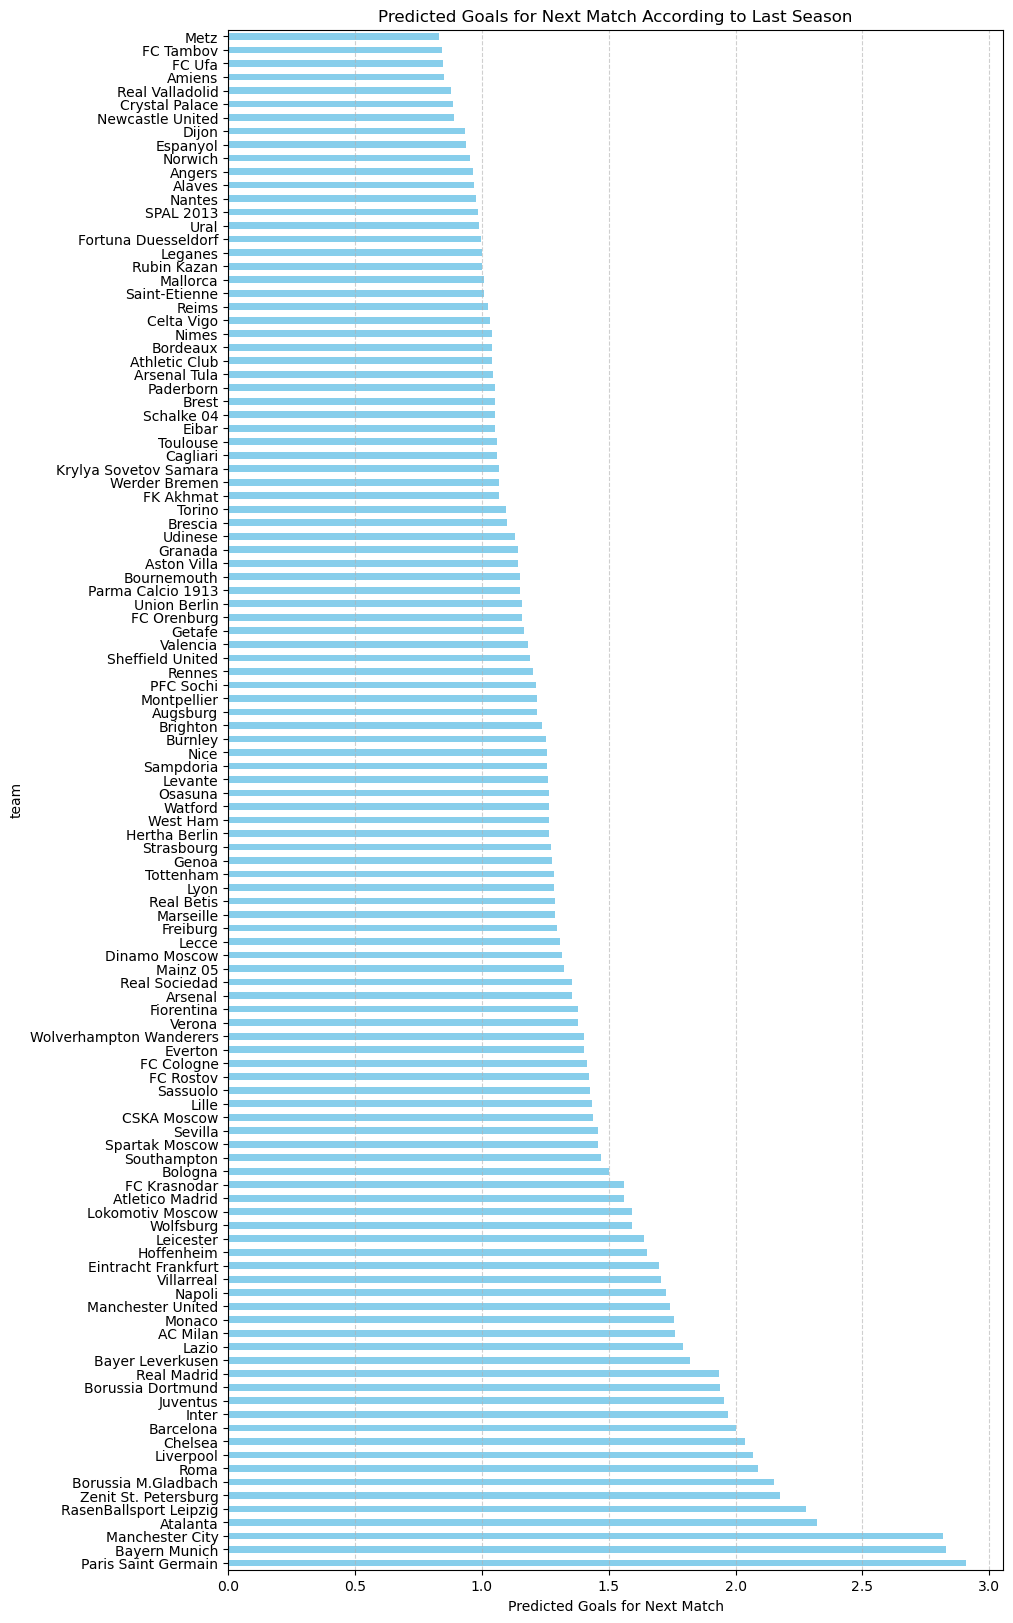

In [29]:
# Sort the DataFrame by predicted goals for better visualization
predicted_goals_df3 = aggregated_df_last_season.sort_values(by='Aggregated_Predicted_goals_according_to_last_season', ascending=False)

# Plotting
plt.figure(figsize=(10, 20))
predicted_goals_df3['Aggregated_Predicted_goals_according_to_last_season'].plot(kind='barh', color='skyblue')
plt.xlabel('Predicted Goals for Next Match')
plt.title('Predicted Goals for Next Match According to Last Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Predicting the total points expected to be scored in upcoming season by teams from 6 leagues based on last 5 seasons

In [30]:
new_df = pd.read_csv("D:/understat.com.csv")
new_df

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838078   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

In [31]:
points_prediction = new_df.copy()
points_prediction

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838078   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

In [32]:
features_tot_pts = points_prediction[['matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts', 'xpts_diff']]
target_tot_pts = points_prediction['pts']
                                     
X_train4, X_test4, y_train4, y_test4 = train_test_split(features_tot_pts, target_tot_pts, test_size=0.2, random_state=42)
ols.fit(X_train4, y_train4)
points_prediction['Predicted_points_next_season'] = ols.predict(points_prediction[['matches', 'wins', 'draws', 'loses', 'scored', 'missed', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep', 'deep_allowed', 'xpts', 'xpts_diff']])
points_prediction

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...   xGA_diff      npxGA      npxGD  ppda_coef  \
0        4     110      21  ...   7.444293  24.727907  73.049305   5.683535   
1        6     118      38  ...   4.607198  38.890805  47.213090  10.209085   
2        6      67      29  ...   0.069107  26.839271  25.748737   8.982028   
3        5      70      32  ...   7.392572  33.446477  16.257501   8.709827   
4        8      71      45  ...   2.862742  41.916529  20.178070   8.276148   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  -0.149741  32.780898  -0.096048  12.838078   
680     13      27      46  ...  -5.373804  38.363370 -10.495864  11.199502   
681     15      33      40  ...   2.980693  37.550114  -7.777201  11.949903   
682     17      37      41  ...  -1.252062  34.468003 -12.231948  14.666049   
683     17      28      52  ... -14.830203  32.644130   0.201339  12.830908   

     oppda_coef  deep  deep_allowed     xpts  xpts_diff  \
0     16.367593   489           114  94.0813     0.0813   
1     12.929510   351           153  81.7489   -10.2511   
2      9.237091   197           123  73.1353    -4.8647   
3      7.870225   203           172  63.7068   -13.2932   
4      9.477805   305           168  67.3867    -8.6133   
..          ...   ...           ...      ...        ...   
679   10.562327   175           206  38.6587     5.6587   
680   10.806357   124           206  36.5424     5.5424   
681   10.080858   103           215  36.3363     5.3363   
682    9.192768   150           270  29.2413    -1.7587   
683    9.464581   153           215  39.2364    12.2364   

     Predicted_points_next_season  
0                            94.0  
1                            92.0  
2                            78.0  
3                            77.0  
4                            76.0  
..                            ...  
679                          33.0  
680                          31.0  
681                          31.0  
682                          31.0  
683                          27.0  

[684 rows x 25 columns]

In [33]:
# Make predictions on the test set
y_pred = ols.predict(X_test4)

# Calculate R^2 score
r2_accuracy = r2_score(y_test4, y_pred)

# Alternatively, you can calculate Mean Squared Error (MSE)
mse_accuracy = mean_squared_error(y_test4, y_pred)

print(f'R^2 Accuracy: {r2_accuracy:.4f}')
print(f'Mean Squared Error: {mse_accuracy:.4f}')

R^2 Accuracy: 1.0000
Mean Squared Error: 0.0000


In [34]:
mean_Predicted_points = points_prediction.groupby('team')['Predicted_points_next_season'].transform('mean')
points_prediction['Average_predicted_points_next_season'] = mean_Predicted_points
points_prediction

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  \
0        4     110      21  ...  24.727907  73.049305   5.683535   16.367593   
1        6     118      38  ...  38.890805  47.213090  10.209085   12.929510   
2        6      67      29  ...  26.839271  25.748737   8.982028    9.237091   
3        5      70      32  ...  33.446477  16.257501   8.709827    7.870225   
4        8      71      45  ...  41.916529  20.178070   8.276148    9.477805   
..     ...     ...     ...  ...        ...        ...        ...         ...   
679     13      40      39  ...  32.780898  -0.096048  12.838078   10.562327   
680     13      27      46  ...  38.363370 -10.495864  11.199502   10.806357   
681     15      33      40  ...  37.550114  -7.777201  11.949903   10.080858   
682     17      37      41  ...  34.468003 -12.231948  14.666049    9.192768   
683     17      28      52  ...  32.644130   0.201339  12.830908    9.464581   

     deep  deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0     489           114  94.0813     0.0813                          94.0   
1     351           153  81.7489   -10.2511                          92.0   
2     197           123  73.1353    -4.8647                          78.0   
3     203           172  63.7068   -13.2932                          77.0   
4     305           168  67.3867    -8.6133                          76.0   
..    ...           ...      ...        ...                           ...   
679   175           206  38.6587     5.6587                          33.0   
680   124           206  36.5424     5.5424                          31.0   
681   103           215  36.3363     5.3363                          31.0   
682   150           270  29.2413    -1.7587                          31.0   
683   153           215  39.2364    12.2364                          27.0   

     Average_predicted_points_next_season  
0                               89.500000  
1                               84.333333  
2                               78.166667  
3                               59.000000  
4                               64.500000  
..                                    ...  
679                             33.000000  
680                             40.166667  
681                             30.500000  
682                             31.000000  
683                             33.333333  

[684 rows x 26 columns]

In [35]:
team_vs_average_points_prediction = points_prediction.groupby('team').agg({
    'Average_predicted_points_next_season' : 'first'
})
team_vs_average_points_prediction

Average_predicted_points_next_season
team                                                         
AC Milan                                            61.666667
Alaves                                              47.750000
Almeria                                             32.000000
Amiens                                              35.333333
Amkar                                               33.250000
...                                                       ...
West Bromwich Albion                                40.750000
West Ham                                            47.833333
Wolfsburg                                           48.000000
Wolverhampton Wanderers                             58.000000
Zenit St. Petersburg                                62.666667

[168 rows x 1 columns]

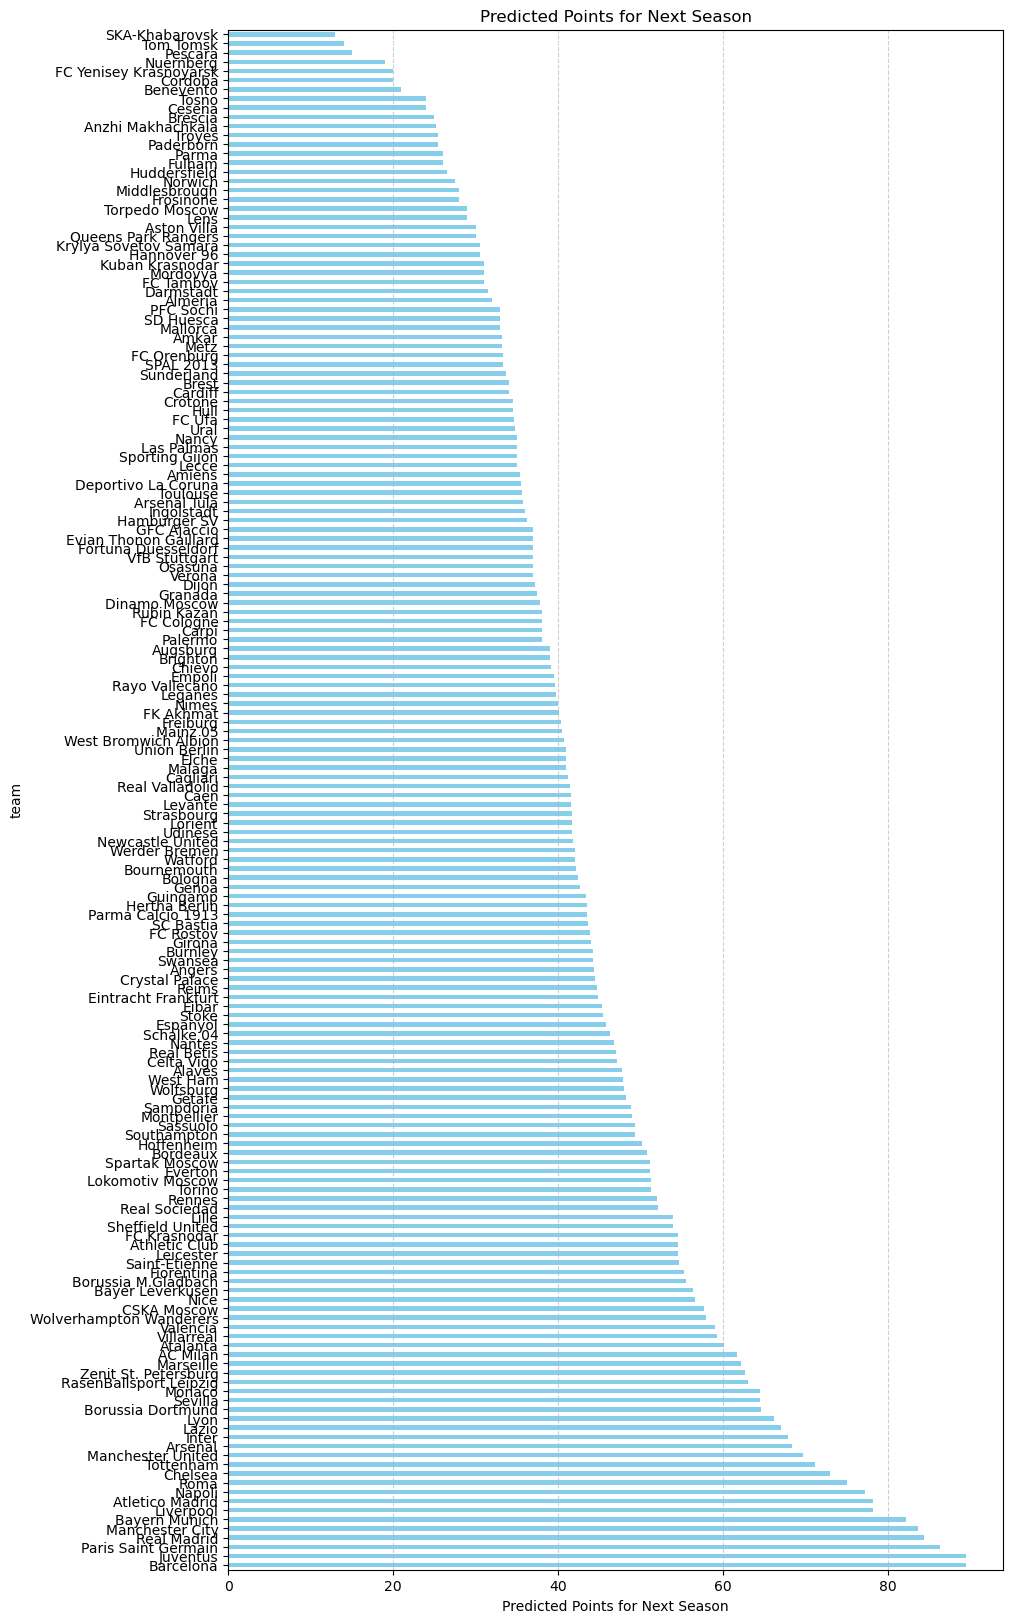

In [36]:
# Sort the DataFrame by predicted goals for better visualization
predicted_points_df = team_vs_average_points_prediction.sort_values(by='Average_predicted_points_next_season', ascending=False)

# Plotting
plt.figure(figsize=(10, 20))
predicted_points_df['Average_predicted_points_next_season'].plot(kind='barh', color='skyblue')
plt.xlabel('Predicted Points for Next Season')
plt.title('Predicted Points for Next Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Winner Prediction

In [37]:
# Find the index of the row with the highest 'Average_predicted_points_next_season' for each league
idx = points_prediction.groupby('league')['Average_predicted_points_next_season'].idxmax()

# Use the index to get the corresponding rows from the original DataFrame
winner_prediction = points_prediction.loc[idx, ['league', 'team', 'Average_predicted_points_next_season']]

In [38]:
winner_prediction

league                  team  Average_predicted_points_next_season
240  Bundesliga         Bayern Munich                             82.166667
121         EPL       Manchester City                             83.666667
0       La_liga             Barcelona                             89.500000
468     Ligue_1   Paris Saint Germain                             86.333333
588        RFPL  Zenit St. Petersburg                             62.666667
348     Serie_A              Juventus                             89.500000

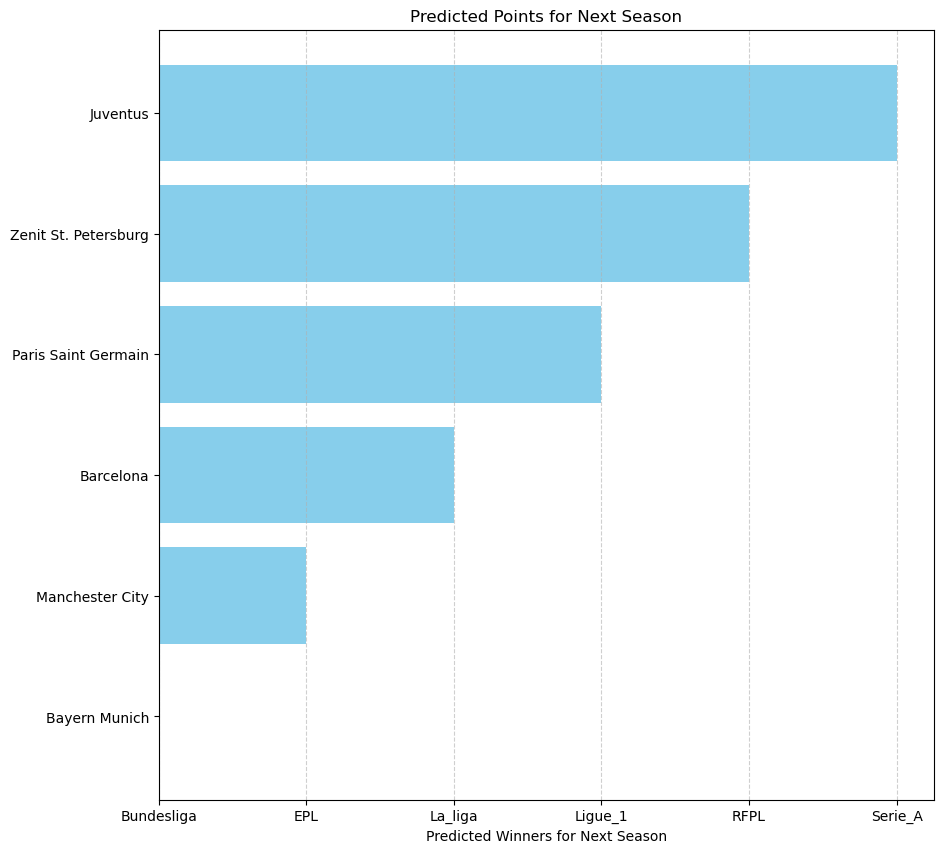

In [39]:
# Plotting
plt.figure(figsize=(10, 10))
plt.barh(winner_prediction['team'], winner_prediction['league'], color='skyblue')
plt.xlabel('Predicted Winners for Next Season')
plt.title('Predicted Points for Next Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Predicted Points Table of BundesLiga

In [40]:
check = new_df[(new_df['year'] == 2018) & (new_df['league'] == 'Bundesliga')]
check[['team', 'pts']]

team  pts
312           Bayern Munich   78
313       Borussia Dortmund   76
314  RasenBallsport Leipzig   66
315        Bayer Leverkusen   58
316     Borussia M.Gladbach   55
317               Wolfsburg   55
318     Eintracht Frankfurt   54
319           Werder Bremen   53
320              Hoffenheim   51
321     Fortuna Duesseldorf   44
322           Hertha Berlin   43
323                Mainz 05   43
324                Freiburg   36
325              Schalke 04   33
326                Augsburg   32
327           VfB Stuttgart   28
328             Hannover 96   21
329               Nuernberg   19

In [41]:
check1 = new_df[(new_df['year'] == 2019) & (new_df['league'] == 'Bundesliga')]
check1[['team', 'pts']]

team  pts
330           Bayern Munich   82
331       Borussia Dortmund   69
332  RasenBallsport Leipzig   66
333     Borussia M.Gladbach   65
334        Bayer Leverkusen   63
335              Hoffenheim   52
336               Wolfsburg   49
337                Freiburg   48
338     Eintracht Frankfurt   45
339           Hertha Berlin   41
340            Union Berlin   41
341              Schalke 04   39
342                Mainz 05   37
343                Augsburg   36
344              FC Cologne   36
345           Werder Bremen   31
346     Fortuna Duesseldorf   30
347               Paderborn   20

In [42]:
predicted_points_table_Bundesliga = points_prediction[points_prediction['league'] == 'Bundesliga']
predicted_points_table_Bundesliga

league  year  position                 team  matches  wins  draws  \
240  Bundesliga  2014         1        Bayern Munich       34    25      4   
241  Bundesliga  2014         2            Wolfsburg       34    20      9   
242  Bundesliga  2014         3  Borussia M.Gladbach       34    19      9   
243  Bundesliga  2014         4     Bayer Leverkusen       34    17     10   
244  Bundesliga  2014         5             Augsburg       34    15      4   
..          ...   ...       ...                  ...      ...   ...    ...   
343  Bundesliga  2019        14             Augsburg       34     9      9   
344  Bundesliga  2019        15           FC Cologne       34    10      6   
345  Bundesliga  2019        16        Werder Bremen       34     8      7   
346  Bundesliga  2019        17  Fortuna Duesseldorf       34     6     12   
347  Bundesliga  2019        18            Paderborn       34     4      8   

     loses  scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  \
240      5      80      18  ...  20.423172  41.236085   5.761476   25.022717   
241      5      72      38  ...  36.419255  18.897371   9.136319   10.289876   
242      6      53      26  ...  33.312193  16.156039  12.751108   12.783803   
243      7      62      37  ...  30.173724  18.224194   5.693289    7.347595   
244     15      43      43  ...  43.628491  -5.908343   7.625900   10.402360   
..     ...     ...     ...  ...        ...        ...        ...         ...   
343     16      45      63  ...  58.361730 -18.294165  16.804008    8.402157   
344     18      51      69  ...  49.997671  -3.751162  11.448608   10.410441   
345     19      42      69  ...  56.182084 -22.990440  12.852066   11.041743   
346     16      36      67  ...  60.659343 -27.999481  16.810429   11.745078   
347     22      37      74  ...  64.044988 -28.610230  14.440759    9.219687   

     deep  deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
240   388            83  73.6116    -5.3884                          79.0   
241   172           164  59.9509    -9.0491                          69.0   
242   221           198  57.0078    -8.9922                          66.0   
243   246           108  55.3396    -5.6604                          61.0   
244   134           221  45.4960    -3.5040                          49.0   
..    ...           ...      ...        ...                           ...   
343   133           223  39.7766     3.7766                          36.0   
344   167           226  43.8903     7.8903                          36.0   
345   186           205  35.1185     4.1185                          31.0   
346   143           207  32.8686     2.8686                          30.0   
347   113           295  28.6711     8.6711                          20.0   

     Average_predicted_points_next_season  
240                             82.166667  
241                             48.000000  
242                             55.500000  
243                             56.333333  
244                             39.000000  
..                                    ...  
343                             39.000000  
344                             38.000000  
345                             42.000000  
346                             37.000000  
347                             25.500000  

[108 rows x 26 columns]

In [43]:
predicted_points_table_Bundesliga = predicted_points_table_Bundesliga[predicted_points_table_Bundesliga['year'] == predicted_points_table_Bundesliga['year'].max()]
predicted_points_table_Bundesliga = predicted_points_table_Bundesliga.drop(predicted_points_table_Bundesliga.tail(3).index).reset_index(drop=True)
predicted_points_table_Bundesliga

league  year  position                    team  matches  wins  draws  \
0   Bundesliga  2019         1           Bayern Munich       34    26      4   
1   Bundesliga  2019         2       Borussia Dortmund       34    21      6   
2   Bundesliga  2019         3  RasenBallsport Leipzig       34    18     12   
3   Bundesliga  2019         4     Borussia M.Gladbach       34    20      5   
4   Bundesliga  2019         5        Bayer Leverkusen       34    19      6   
5   Bundesliga  2019         6              Hoffenheim       34    15      7   
6   Bundesliga  2019         7               Wolfsburg       34    13     10   
7   Bundesliga  2019         8                Freiburg       34    13      9   
8   Bundesliga  2019         9     Eintracht Frankfurt       34    13      6   
9   Bundesliga  2019        10           Hertha Berlin       34    11      8   
10  Bundesliga  2019        11            Union Berlin       34    12      5   
11  Bundesliga  2019        12              Schalke 04       34     9     12   
12  Bundesliga  2019        13                Mainz 05       34    11      4   
13  Bundesliga  2019        14                Augsburg       34     9      9   
14  Bundesliga  2019        15              FC Cologne       34    10      6   

    loses  scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  \
0       4     100      32  ...  33.440558  54.864345   8.064508   21.020124   
1       7      84      41  ...  39.751707  22.994717  12.121839   18.710656   
2       4      81      37  ...  36.069432  36.268347  10.691325   14.923454   
3       9      66      40  ...  44.538147  24.468871  11.758087   12.367937   
4       9      61      44  ...  48.163410  12.205596   7.916517   15.849619   
5      12      53      53  ...  52.689540   0.940069  13.013992   13.912956   
6      11      48      46  ...  38.117894  13.284496  10.050284    9.985283   
7      12      48      47  ...  60.311458 -18.717060  15.682417   12.035509   
8      15      59      60  ...  48.652886   8.165209  10.365417   13.252926   
9      15      48      59  ...  50.273578  -8.248113  14.629213   12.290545   
10     17      41      58  ...  51.910915 -14.122381  12.870873    9.583942   
11     13      38      58  ...  49.676254 -15.265756  10.874585   10.072687   
12     19      44      65  ...  59.109234 -15.192862  13.313749    8.883933   
13     16      45      63  ...  58.361730 -18.294165  16.804008    8.402157   
14     18      51      69  ...  49.997671  -3.751162  11.448608   10.410441   

    deep  deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0    407           119  77.3257    -4.6743                          82.0   
1    297           135  62.4827    -6.5173                          69.0   
2    303           157  68.7067     2.7067                          66.0   
3    232           166  62.6315    -2.3685                          65.0   
4    230           158  54.6178    -8.3822                          63.0   
5    201           230  45.8749    -6.1251                          52.0   
6    192           171  55.6943     6.6943                          49.0   
7    158           258  39.1515    -8.8485                          48.0   
8    188           166  52.7225     7.7225                          45.0   
9    151           241  39.5544    -1.4456                          41.0   
10   119           216  39.3247    -1.6753                          41.0   
11   194           180  35.8382    -3.1618                          39.0   
12   181           242  39.1500     2.1500                          37.0   
13   133           223  39.7766     3.7766                          36.0   
14   167           226  43.8903     7.8903                          36.0   

    Average_predicted_points_next_season  
0                              82.166667  
1                              64.666667  
2                              63.000000  
3                              55.500000  
4                             

In [44]:
predicted_points_table_Bundesliga = predicted_points_table_Bundesliga.groupby('team').agg({
    'league' : 'first',
    'Average_predicted_points_next_season' : 'first'
})
predicted_points_table_Bundesliga = predicted_points_table_Bundesliga.sort_values(by='Average_predicted_points_next_season',ascending=False)
predicted_points_table_Bundesliga.reset_index(inplace=True)
predicted_points_table_Bundesliga.index = predicted_points_table_Bundesliga.index + 1
predicted_points_table_Bundesliga

team      league  Average_predicted_points_next_season
1            Bayern Munich  Bundesliga                             82.166667
2        Borussia Dortmund  Bundesliga                             64.666667
3   RasenBallsport Leipzig  Bundesliga                             63.000000
4         Bayer Leverkusen  Bundesliga                             56.333333
5      Borussia M.Gladbach  Bundesliga                             55.500000
6               Hoffenheim  Bundesliga                             50.166667
7                Wolfsburg  Bundesliga                             48.000000
8               Schalke 04  Bundesliga                             46.333333
9      Eintracht Frankfurt  Bundesliga                             44.833333
10           Hertha Berlin  Bundesliga                             43.500000
11            Union Berlin  Bundesliga                             41.000000
12                Mainz 05  Bundesliga                             40.500000
13                Freiburg  Bundesliga                             40.400000
14                Augsburg  Bundesliga                             39.000000
15              FC Cologne  Bundesliga                             38.000000

# Predicted Points Table of Laliga

In [45]:
check2 = new_df[(new_df['year'] == 2018) & (new_df['league'] == 'La_liga')]
check2[['team', 'pts']]

team  pts
80        Barcelona   87
81  Atletico Madrid   76
82      Real Madrid   68
83         Valencia   61
84          Sevilla   59
85           Getafe   59
86         Espanyol   53
87    Athletic Club   53
88    Real Sociedad   50
89           Alaves   50
90       Real Betis   50
91            Eibar   47
92          Leganes   45
93          Levante   44
94       Villarreal   44
95       Celta Vigo   41
96  Real Valladolid   41
97           Girona   37
98        SD Huesca   33
99   Rayo Vallecano   32

In [46]:
check3 = new_df[(new_df['year'] == 2019) & (new_df['league'] == 'La_liga')]
check3[['team', 'pts']]

team  pts
100      Real Madrid   87
101        Barcelona   82
102          Sevilla   70
103  Atletico Madrid   70
104       Villarreal   60
105    Real Sociedad   56
106          Granada   56
107           Getafe   54
108         Valencia   53
109          Osasuna   52
110    Athletic Club   51
111          Levante   49
112  Real Valladolid   42
113            Eibar   42
114       Real Betis   41
115           Alaves   39
116       Celta Vigo   37
117          Leganes   36
118         Mallorca   33
119         Espanyol   25

In [47]:
predicted_points_table_Laliga = points_prediction[points_prediction['league'] == 'La_liga']
predicted_points_table_Laliga

league  year  position             team  matches  wins  draws  loses  \
0    La_liga  2014         1        Barcelona       38    30      4      4   
1    La_liga  2014         2      Real Madrid       38    30      2      6   
2    La_liga  2014         3  Atletico Madrid       38    23      9      6   
3    La_liga  2014         4         Valencia       38    22     11      5   
4    La_liga  2014         5          Sevilla       38    23      7      8   
..       ...   ...       ...              ...      ...   ...    ...    ...   
115  La_liga  2019        16           Alaves       38    10      9     19   
116  La_liga  2019        17       Celta Vigo       38     7     16     15   
117  La_liga  2019        18          Leganes       38     8     12     18   
118  La_liga  2019        19         Mallorca       38     9      6     23   
119  La_liga  2019        20         Espanyol       38     5     10     23   

     scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
0       110      21  ...  24.727907  73.049305   5.683535   16.367593   489   
1       118      38  ...  38.890805  47.213090  10.209085   12.929510   351   
2        67      29  ...  26.839271  25.748737   8.982028    9.237091   197   
3        70      32  ...  33.446477  16.257501   8.709827    7.870225   203   
4        71      45  ...  41.916529  20.178070   8.276148    9.477805   305   
..      ...     ...  ...        ...        ...        ...         ...   ...   
115      34      59  ...  46.780883 -13.093103  12.210775    7.770152   130   
116      37      49  ...  41.113454  -7.361763  10.544066    9.694045   188   
117      30      51  ...  40.417900  -5.268822  10.913984    7.726034   158   
118      40      65  ...  53.278525 -20.254996  12.742766    7.619622   131   
119      27      58  ...  47.916092 -13.886380   9.441301   10.059594   148   

     deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0             114  94.0813     0.0813                          94.0   
1             153  81.7489   -10.2511                          92.0   
2             123  73.1353    -4.8647                          78.0   
3             172  63.7068   -13.2932                          77.0   
4             168  67.3867    -8.6133                          76.0   
..            ...      ...        ...                           ...   
115           220  40.9770     1.9770                          39.0   
116           215  47.2581    10.2581                          37.0   
117           166  48.9190    12.9190                          36.0   
118           309  35.3568     2.3568                          33.0   
119           191  41.7590    16.7590                          25.0   

     Average_predicted_points_next_season  
0                               89.500000  
1                               84.333333  
2                               78.166667  
3                               59.000000  
4                               64.500000  
..                                    ...  
115                             47.750000  
116                             47.166667  
117                             39.750000  
118                             33.000000  
119                             45.833333  

[120 rows x 26 columns]

In [48]:
predicted_points_table_Laliga = predicted_points_table_Laliga[predicted_points_table_Laliga['year'] == predicted_points_table_Laliga['year'].max()]
predicted_points_table_Laliga = predicted_points_table_Laliga.drop(predicted_points_table_Laliga.tail(3).index).reset_index(drop=True)
predicted_points_table_Laliga

league  year  position             team  matches  wins  draws  loses  \
0   La_liga  2019         1      Real Madrid       38    26      9      3   
1   La_liga  2019         2        Barcelona       38    25      7      6   
2   La_liga  2019         3          Sevilla       38    19     13      6   
3   La_liga  2019         4  Atletico Madrid       38    18     16      4   
4   La_liga  2019         5       Villarreal       38    18      6     14   
5   La_liga  2019         6    Real Sociedad       38    16      8     14   
6   La_liga  2019         7          Granada       38    16      8     14   
7   La_liga  2019         8           Getafe       38    14     12     12   
8   La_liga  2019         9         Valencia       38    14     11     13   
9   La_liga  2019        10          Osasuna       38    13     13     12   
10  La_liga  2019        11    Athletic Club       38    13     12     13   
11  La_liga  2019        12          Levante       38    14      7     17   
12  La_liga  2019        13  Real Valladolid       38     9     15     14   
13  La_liga  2019        14            Eibar       38    11      9     18   
14  La_liga  2019        15       Real Betis       38    10     11     17   
15  La_liga  2019        16           Alaves       38    10      9     19   
16  La_liga  2019        17       Celta Vigo       38     7     16     15   

    scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
0       70      25  ...  31.659710  32.321739   9.262202   14.476897   334   
1       86      38  ...  32.620992  34.928789   8.256988   17.961598   440   
2       54      34  ...  33.628775  16.324050   8.411133   12.642357   238   
3       51      27  ...  28.542603  24.196848   9.686665   10.994450   264   
4       63      49  ...  41.832685  15.597880  10.900010   12.067332   218   
5       56      48  ...  35.196378  12.003165   8.649489   11.924641   231   
6       52      45  ...  39.723106   1.581915  10.176947    7.772832   135   
7       43      37  ...  38.563985   1.322649   7.005995    6.302145   176   
8       46      53  ...  52.384285 -12.754138  14.086311   10.543273   217   
9       46      54  ...  45.864071  -2.771806   9.097908    8.506952   197   
10      41      38  ...  47.216360 -12.621221   9.713231   10.225018   122   
11      47      53  ...  58.887593 -13.175843  12.009367    8.825311   177   
12      32      43  ...  47.991425 -16.949872  12.394397    8.319263   109   
13      39      56  ...  49.715846 -14.963860   8.973649    9.554977   141   
14      48      60  ...  48.127908  -5.175230  10.362792   11.853481   236   
15      34      59  ...  46.780883 -13.093103  12.210775    7.770152   130   
16      37      49  ...  41.113454  -7.361763  10.544066    9.694045   188   

    deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0            127  77.6868    -9.3132                          87.0   
1            146  73.1381    -8.8619                          82.0   
2            148  65.7050    -4.2950                          70.0   
3            162  72.3506     2.3506                          70.0   
4            228  64.0527     4.0527                          60.0   
5            192  57.1783     1.1783                          56.0   
6            197  52.5969    -3.4031                          56.0   
7            119  53.7878    -0.2122                          54.0   
8            262  45.4291    -7.5709                          53.0   
9            191  51.5097    -0.4903                          52.0   
10           205  44.6548    -6.3452                          51.0   
11           273  42.8790    -6.1210                          49.0   
12           226  39.3828    -2.6172                          42.0   
13           197  42.9070     0.9070                          42.0   
14           216  47.9371     6.9371                          41.0   
15           220  40.9770     1.9770                          39.0   
16           215  47.25

In [49]:
predicted_points_table_Laliga = predicted_points_table_Laliga.groupby('team').agg({
    'league' : 'first',
    'Average_predicted_points_next_season' : 'first'
})
predicted_points_table_Laliga = predicted_points_table_Laliga.sort_values(by='Average_predicted_points_next_season',ascending=False)
predicted_points_table_Laliga.reset_index(inplace=True)
predicted_points_table_Laliga.index = predicted_points_table_Laliga.index + 1
predicted_points_table_Laliga

team   league  Average_predicted_points_next_season
1         Barcelona  La_liga                             89.500000
2       Real Madrid  La_liga                             84.333333
3   Atletico Madrid  La_liga                             78.166667
4           Sevilla  La_liga                             64.500000
5        Villarreal  La_liga                             59.333333
6          Valencia  La_liga                             59.000000
7     Athletic Club  La_liga                             54.500000
8     Real Sociedad  La_liga                             52.166667
9            Getafe  La_liga                             48.200000
10           Alaves  La_liga                             47.750000
11       Celta Vigo  La_liga                             47.166667
12       Real Betis  La_liga                             47.000000
13            Eibar  La_liga                             45.333333
14          Levante  La_liga                             41.600000
15  Real Valladolid  La_liga                             41.500000
16          Granada  La_liga                             37.500000
17          Osasuna  La_liga                             37.000000

# Predicted Points Table of Premier League

In [50]:
check4 = new_df[(new_df['year'] == 2018) & (new_df['league'] == 'EPL')]
check4[['team', 'pts']]

team  pts
200          Manchester City   98
201                Liverpool   97
202                  Chelsea   72
203                Tottenham   71
204                  Arsenal   70
205        Manchester United   66
206  Wolverhampton Wanderers   57
207                  Everton   54
208                 West Ham   52
209                Leicester   52
210                  Watford   50
211           Crystal Palace   49
212         Newcastle United   45
213              Bournemouth   45
214                  Burnley   40
215              Southampton   39
216                 Brighton   36
217                  Cardiff   34
218                   Fulham   26
219             Huddersfield   16

In [51]:
check5 = new_df[(new_df['year'] == 2019) & (new_df['league'] == 'EPL')]
check5[['team', 'pts']]

team  pts
220                Liverpool   99
221          Manchester City   81
222        Manchester United   66
223                  Chelsea   66
224                Leicester   62
225                Tottenham   59
226  Wolverhampton Wanderers   59
227                  Arsenal   56
228                  Burnley   54
229         Sheffield United   54
230              Southampton   52
231                  Everton   49
232         Newcastle United   44
233           Crystal Palace   43
234                 Brighton   41
235                 West Ham   39
236              Aston Villa   35
237                  Watford   34
238              Bournemouth   34
239                  Norwich   21

In [52]:
predicted_points_table_EPL = points_prediction[points_prediction['league'] == 'EPL']
predicted_points_table_EPL

league  year  position               team  matches  wins  draws  loses  \
120    EPL  2014         1            Chelsea       38    26      9      3   
121    EPL  2014         2    Manchester City       38    24      7      7   
122    EPL  2014         3            Arsenal       38    22      9      7   
123    EPL  2014         4  Manchester United       38    20     10      8   
124    EPL  2014         5          Tottenham       38    19      7     12   
..     ...   ...       ...                ...      ...   ...    ...    ...   
235    EPL  2019        16           West Ham       38    10      9     19   
236    EPL  2019        17        Aston Villa       38     9      8     21   
237    EPL  2019        18            Watford       38     8     10     20   
238    EPL  2019        19        Bournemouth       38     9      7     22   
239    EPL  2019        20            Norwich       38     5      6     27   

     scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
120      73      32  ...  29.240835  35.499567  10.942027   13.419520   407   
121      83      38  ...  37.454762  32.154329   7.982490   15.076979   575   
122      71      36  ...  33.435352  31.039052   8.660596   13.254169   398   
123      62      37  ...  36.797702  13.603311   7.648715   15.521977   267   
124      58      53  ...  51.598938  -3.171924   8.000237   11.300694   210   
..      ...     ...  ...        ...        ...        ...         ...   ...   
235      49      62  ...  63.756339 -17.731903  14.387997   10.826785   217   
236      41      67  ...  66.884367 -24.231866  13.377096    8.178344   186   
237      36      64  ...  52.522923 -10.049648  13.531828   10.267282   227   
238      40      65  ...  58.727337 -17.100878  14.240720    9.699334   210   
239      26      75  ...  66.126467 -30.414633  14.340709   10.183110   207   

     deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
120           171  75.3172   -11.6828                          87.0   
121           144  73.0982    -5.9018                          79.0   
122           171  75.1740     0.1740                          75.0   
123           194  63.0327    -6.9673                          70.0   
124           232  48.9361   -15.0639                          64.0   
..            ...      ...        ...                           ...   
235           308  38.7474    -0.2526                          39.0   
236           343  37.2269     2.2269                          35.0   
237           259  47.8737    13.8737                          34.0   
238           326  39.1979     5.1979                          34.0   
239           345  33.1223    12.1223                          21.0   

     Average_predicted_points_next_season  
120                             73.000000  
121                             83.666667  
122                             68.333333  
123                             69.666667  
124                             71.166667  
..                                    ...  
235                             47.833333  
236                             30.000000  
237                             42.000000  
238                             42.200000  
239                             27.500000  

[120 rows x 26 columns]

In [53]:
predicted_points_table_EPL = predicted_points_table_EPL[predicted_points_table_EPL['year'] == predicted_points_table_EPL['year'].max()]
predicted_points_table_EPL = predicted_points_table_EPL.drop(predicted_points_table_EPL.tail(3).index).reset_index(drop=True)
predicted_points_table_EPL

league  year  position                     team  matches  wins  draws  \
0     EPL  2019         1                Liverpool       38    32      3   
1     EPL  2019         2          Manchester City       38    26      3   
2     EPL  2019         3        Manchester United       38    18     12   
3     EPL  2019         4                  Chelsea       38    20      6   
4     EPL  2019         5                Leicester       38    18      8   
5     EPL  2019         6                Tottenham       38    16     11   
6     EPL  2019         7  Wolverhampton Wanderers       38    15     14   
7     EPL  2019         8                  Arsenal       38    14     14   
8     EPL  2019         9                  Burnley       38    15      9   
9     EPL  2019        10         Sheffield United       38    14     12   
10    EPL  2019        11              Southampton       38    15      7   
11    EPL  2019        12                  Everton       38    13     10   
12    EPL  2019        13         Newcastle United       38    11     11   
13    EPL  2019        14           Crystal Palace       38    11     10   
14    EPL  2019        15                 Brighton       38     9     14   
15    EPL  2019        16                 West Ham       38    10      9   
16    EPL  2019        17              Aston Villa       38     9      8   

    loses  scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  \
0       3      85      33  ...  38.811728  32.575792   8.607605   24.738212   
1       9     102      35  ...  34.714123  58.818903   9.314521   25.488707   
2       8      66      36  ...  35.775659  19.754725  10.469858   12.809707   
3      12      69      54  ...  39.565968  31.333631   9.688096   16.610286   
4      12      67      41  ...  40.282434  15.391501   9.118037   14.196062   
5      11      61      47  ...  48.798972  -2.966332  12.802596   11.162359   
6       9      51      40  ...  34.961054  16.218258  14.661360   11.554360   
7      10      56      48  ...  51.007596  -2.468798  12.367654   12.988094   
8      14      43      50  ...  50.018310  -2.954927  13.252874   10.472003   
9      12      39      39  ...  49.758945  -4.708494  15.052348   12.548963   
10     16      51      60  ...  53.547914  -1.012431   8.770105   11.179211   
11     15      44      56  ...  46.167031   6.781945  10.840476   10.878359   
12     16      38      58  ...  65.507011 -29.776444  21.896752    7.863314   
13     17      31      50  ...  56.631067 -24.466621  15.315904    8.344129   
14     15      39      54  ...  58.893509 -12.991779  11.499762   13.547683   
15     19      49      62  ...  63.756339 -17.731903  14.387997   10.826785   
16     21      41      67  ...  66.884367 -24.231866  13.377096    8.178344   

    deep  deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0    429           145  74.2784   -24.7216                          99.0   
1    547           135  86.7564     5.7564                          81.0   
2    290           178  70.9917     4.9917                          66.0   
3    326           169  73.4872     7.4872                          66.0   
4    293           203  61.1553    -0.8447                          62.0   
5    224           264  49.2646    -9.7354                          59.0   
6    172           193  63.8213     4.8213                          59.0   
7    265           253  50.1471    -5.8529                          56.0   
8    145           263  49.5405    -4.4595                          54.0   
9    198           231  49.3411    -4.6589                          54.0   
10   230           249  56.8654     4.8654                          52.0   
11   203           215  55.7761     6.7761                          49.0   
12   132           344  31.9173   -12.0827                          44.0   
13   225           281  38.2630    -4.7370                          43.0   
14   242           264  48.0241     7.0241                          41.

In [54]:
predicted_points_table_EPL = predicted_points_table_EPL.groupby('team').agg({
    'league' : 'first',
    'Average_predicted_points_next_season' : 'first'
})
predicted_points_table_EPL = predicted_points_table_EPL.sort_values(by='Average_predicted_points_next_season',ascending=False)
predicted_points_table_EPL.reset_index(inplace=True)
predicted_points_table_EPL.index = predicted_points_table_EPL.index + 1
predicted_points_table_EPL

team league  Average_predicted_points_next_season
1           Manchester City    EPL                             83.666667
2                 Liverpool    EPL                             78.166667
3                   Chelsea    EPL                             73.000000
4                 Tottenham    EPL                             71.166667
5         Manchester United    EPL                             69.666667
6                   Arsenal    EPL                             68.333333
7   Wolverhampton Wanderers    EPL                             58.000000
8                 Leicester    EPL                             54.500000
9          Sheffield United    EPL                             54.000000
10                  Everton    EPL                             51.166667
11              Southampton    EPL                             49.333333
12                 West Ham    EPL                             47.833333
13           Crystal Palace    EPL                             44.500000
14                  Burnley    EPL                             44.200000
15         Newcastle United    EPL                             41.800000
16                 Brighton    EPL                             39.000000
17              Aston Villa    EPL                             30.000000

# Predicted Points Table of Serie_A

In [55]:
check6 = new_df[(new_df['year'] == 2018) & (new_df['league'] == 'Serie_A')]
check6[['team', 'pts']]

team  pts
428           Juventus   90
429             Napoli   79
430           Atalanta   69
431              Inter   69
432           AC Milan   68
433               Roma   66
434             Torino   63
435              Lazio   59
436          Sampdoria   53
437            Bologna   44
438           Sassuolo   43
439            Udinese   43
440          SPAL 2013   42
441         Fiorentina   41
442           Cagliari   41
443  Parma Calcio 1913   41
444              Genoa   38
445             Empoli   38
446          Frosinone   25
447             Chievo   20

In [56]:
check7 = new_df[(new_df['year'] == 2019) & (new_df['league'] == 'Serie_A')]
check7[['team', 'pts']]

team  pts
448           Juventus   83
449              Inter   82
450              Lazio   78
451           Atalanta   78
452               Roma   70
453           AC Milan   66
454             Napoli   62
455           Sassuolo   51
456             Verona   49
457         Fiorentina   46
458            Bologna   46
459  Parma Calcio 1913   46
460           Cagliari   45
461          Sampdoria   42
462            Udinese   42
463             Torino   39
464              Genoa   36
465              Lecce   35
466            Brescia   25
467          SPAL 2013   20

In [57]:
predicted_points_table_Serie_A = points_prediction[points_prediction['league'] == 'Serie_A']
predicted_points_table_Serie_A

league  year  position        team  matches  wins  draws  loses  scored  \
348  Serie_A  2014         1    Juventus       38    26      9      3      72   
349  Serie_A  2014         2        Roma       38    19     13      6      54   
350  Serie_A  2014         3       Lazio       38    21      6     11      71   
351  Serie_A  2014         4  Fiorentina       38    18     10     10      61   
352  Serie_A  2014         5      Napoli       38    18      9     11      70   
..       ...   ...       ...         ...      ...   ...    ...    ...     ...   
463  Serie_A  2019        16      Torino       37    11      6     20      45   
464  Serie_A  2019        17       Genoa       37     9      9     19      44   
465  Serie_A  2019        18       Lecce       37     9      8     20      49   
466  Serie_A  2019        19     Brescia       38     6      7     25      35   
467  Serie_A  2019        20   SPAL 2013       37     5      5     27      26   

     missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
348      24  ...  25.218658  27.006777   8.715008   13.017563   334   
349      31  ...  32.980881  12.543703   7.874105   13.878387   266   
350      38  ...  31.303666  26.886099   7.282635   11.223855   214   
351      46  ...  46.218629   9.092344   7.757888   12.457943   309   
352      54  ...  32.850910  24.688320   8.836460   13.312875   281   
..      ...  ...        ...        ...        ...         ...   ...   
463      67  ...  53.781328 -17.848338   9.299745    8.487891   168   
464      73  ...  51.675464 -15.027980  11.338278   10.982854   214   
465      81  ...  78.535447 -39.296087  16.884824   10.428722   208   
466      79  ...  70.007692 -29.804029  14.789720    7.180933   190   
467      74  ...  64.392243 -31.510454  12.443110   10.307764   178   

     deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
348           152  74.7890   -12.2110                          87.0   
349           175  62.1641    -7.8359                          70.0   
350           173  67.7905    -1.2095                          69.0   
351           170  61.1128    -2.8872                          64.0   
352           137  70.7221     7.7221                          63.0   
..            ...      ...        ...                           ...   
463           252  37.5829    -1.4171                          39.0   
464           295  44.8129     8.8129                          36.0   
465           350  34.0802    -0.9198                          35.0   
466           375  33.1357     8.1357                          25.0   
467           288  30.0376    10.0376                          20.0   

     Average_predicted_points_next_season  
348                             89.500000  
349                             75.000000  
350                             67.000000  
351                             55.333333  
352                             77.166667  
..                                    ...  
463                             51.333333  
464                             42.666667  
465                             35.000000  
466                             25.000000  
467                             33.333333  

[120 rows x 26 columns]

In [58]:
predicted_points_table_Serie_A = predicted_points_table_Serie_A[predicted_points_table_Serie_A['year'] == predicted_points_table_Serie_A['year'].max()]
predicted_points_table_Serie_A = predicted_points_table_Serie_A.drop(predicted_points_table_Serie_A.tail(3).index).reset_index(drop=True)
predicted_points_table_Serie_A

league  year  position               team  matches  wins  draws  loses  \
0   Serie_A  2019         1           Juventus       38    26      5      7   
1   Serie_A  2019         2              Inter       38    24     10      4   
2   Serie_A  2019         3              Lazio       38    24      6      8   
3   Serie_A  2019         4           Atalanta       38    23      9      6   
4   Serie_A  2019         5               Roma       38    21      7     10   
5   Serie_A  2019         6           AC Milan       38    19      9     10   
6   Serie_A  2019         7             Napoli       38    18      8     12   
7   Serie_A  2019         8           Sassuolo       37    14      9     14   
8   Serie_A  2019         9             Verona       37    12     13     12   
9   Serie_A  2019        10         Fiorentina       37    11     13     13   
10  Serie_A  2019        11            Bologna       37    12     10     15   
11  Serie_A  2019        12  Parma Calcio 1913       37    13      7     17   
12  Serie_A  2019        13           Cagliari       38    11     12     15   
13  Serie_A  2019        14          Sampdoria       38    12      6     20   
14  Serie_A  2019        15            Udinese       37    11      9     17   
15  Serie_A  2019        16             Torino       37    11      6     20   
16  Serie_A  2019        17              Genoa       37     9      9     19   

    scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
0       76      43  ...  31.640492  31.476013   9.041600   15.611712   270   
1       81      36  ...  36.312366  29.178600   9.199278   16.556413   327   
2       79      42  ...  45.481600   8.237226  13.290807   13.495134   345   
3       98      48  ...  37.159127  41.368227   8.020852   13.795980   369   
4       77      51  ...  41.422453  26.235373  11.654482   14.162294   331   
5       63      46  ...  38.540585  19.874563   8.956627   13.002845   323   
6       61      50  ...  37.082686  22.988809  11.922602   17.537664   310   
7       69      62  ...  56.068836  -8.216051  10.162150   12.522486   269   
8       47      48  ...  46.205660  -1.610286   9.333768   11.061412   235   
9       48      47  ...  41.060554   2.569355  13.157460    9.257951   217   
10      51      64  ...  47.233585   4.274770   8.046417   10.544791   216   
11      52      54  ...  53.880567 -14.865820  13.676107    8.774373   190   
12      52      56  ...  54.131521 -16.891008  14.311662    9.755232   166   
13      48      65  ...  49.362819  -8.907749  12.973794    9.991498   205   
14      36      51  ...  43.764550  -2.225134  15.921064   10.508876   204   
15      45      67  ...  53.781328 -17.848338   9.299745    8.487891   168   
16      44      73  ...  51.675464 -15.027980  11.338278   10.982854   214   

    deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0            174  71.2394   -11.7606                          83.0   
1            192  75.3771    -6.6229                          82.0   
2            230  62.1830   -15.8170                          78.0   
3            144  76.0125    -1.9875                          78.0   
4            187  70.2617     0.2617                          70.0   
5            182  65.4665    -0.5335                          66.0   
6            174  66.4911     4.4911                          62.0   
7            246  45.5987    -5.4013                          51.0   
8            294  48.8992    -0.1008                          49.0   
9            187  52.5691     6.5691                          46.0   
10           270  51.7035     5.7035                          46.0   
11           295  39.8739    -6.1261                          46.0   
12           305  40.0540    -4.9460                          45.0   
13           232  49.7119     7.7119                          42.0   
14           263  47.0854     5.0854                          42.0   
15           252  37.5829    -1.4171                     

In [59]:
predicted_points_table_Serie_A = predicted_points_table_Serie_A.groupby('team').agg({
    'league' : 'first',
    'Average_predicted_points_next_season' : 'first'
})
predicted_points_table_Serie_A = predicted_points_table_Serie_A.sort_values(by='Average_predicted_points_next_season',ascending=False)

predicted_points_table_Serie_A.reset_index(inplace=True)
predicted_points_table_Serie_A.index = predicted_points_table_Serie_A.index + 1
predicted_points_table_Serie_A

team   league  Average_predicted_points_next_season
1            Juventus  Serie_A                             89.500000
2              Napoli  Serie_A                             77.166667
3                Roma  Serie_A                             75.000000
4               Inter  Serie_A                             67.833333
5               Lazio  Serie_A                             67.000000
6            AC Milan  Serie_A                             61.666667
7            Atalanta  Serie_A                             60.166667
8          Fiorentina  Serie_A                             55.333333
9              Torino  Serie_A                             51.333333
10           Sassuolo  Serie_A                             49.333333
11          Sampdoria  Serie_A                             48.833333
12  Parma Calcio 1913  Serie_A                             43.500000
13              Genoa  Serie_A                             42.666667
14            Bologna  Serie_A                             42.400000
15            Udinese  Serie_A                             41.666667
16           Cagliari  Serie_A                             41.200000
17             Verona  Serie_A                             37.000000

# Predicted Points Table of Ligue_I

In [60]:
check8 = new_df[(new_df['year'] == 2018) & (new_df['league'] == 'Ligue_1')]
check8[['team', 'pts']]

team  pts
548  Paris Saint Germain   91
549                Lille   75
550                 Lyon   72
551        Saint-Etienne   66
552            Marseille   61
553          Montpellier   59
554                 Nice   56
555                Reims   55
556                Nimes   53
557               Rennes   52
558           Strasbourg   49
559               Nantes   48
560               Angers   46
561             Bordeaux   41
562             Toulouse   38
563               Amiens   38
564               Monaco   36
565                Dijon   34
566                 Caen   33
567             Guingamp   27

In [61]:
check9 = new_df[(new_df['year'] == 2019) & (new_df['league'] == 'Ligue_1')]
check9[['team', 'pts']]

team  pts
568  Paris Saint Germain   68
569            Marseille   56
570               Rennes   50
571                Lille   49
572                 Nice   41
573                Reims   41
574          Montpellier   40
575               Monaco   40
576                 Lyon   40
577               Angers   39
578           Strasbourg   38
579               Nantes   37
580             Bordeaux   37
581                 Metz   34
582                Brest   34
583                Dijon   30
584        Saint-Etienne   30
585                Nimes   27
586               Amiens   23
587             Toulouse   13

In [62]:
predicted_points_table_Ligue_1 = points_prediction[points_prediction['league'] == 'Ligue_1']
predicted_points_table_Ligue_1

league  year  position                 team  matches  wins  draws  \
468  Ligue_1  2014         1  Paris Saint Germain       38    24     11   
469  Ligue_1  2014         2                 Lyon       38    22      9   
470  Ligue_1  2014         3               Monaco       38    20     11   
471  Ligue_1  2014         4            Marseille       38    21      6   
472  Ligue_1  2014         5        Saint-Etienne       38    19     12   
..       ...   ...       ...                  ...      ...   ...    ...   
583  Ligue_1  2019        16                Dijon       28     7      9   
584  Ligue_1  2019        17        Saint-Etienne       28     8      6   
585  Ligue_1  2019        18                Nimes       28     7      6   
586  Ligue_1  2019        19               Amiens       28     4     11   
587  Ligue_1  2019        20             Toulouse       28     3      4   

     loses  scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  \
468      3      83      36  ...  25.960072  41.818530   7.133794   16.841499   
469      7      72      33  ...  37.148094  16.486144   8.994296   11.970015   
470      7      51      26  ...  32.917682  18.369821   8.338964   10.394530   
471     11      76      42  ...  33.366435  24.227179   6.342344    8.526785   
472      7      51      30  ...  33.674206   7.498556   9.445227   11.279169   
..     ...     ...     ...  ...        ...        ...        ...         ...   
583     12      27      37  ...  38.540489 -11.922529  14.308293    9.703021   
584     14      29      45  ...  33.165148  -7.314121  10.718417   10.496213   
585     15      29      44  ...  37.433020  -8.759464  12.457197    9.054791   
586     13      31      50  ...  37.666119 -15.972138  12.449507    9.917285   
587     21      22      58  ...  44.474562 -17.741067  14.032994   10.193535   

     deep  deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
468   321           116  84.1042     1.1042                          83.0   
469   202           136  65.6192    -9.3808                          75.0   
470   228           132  64.8054    -6.1946                          71.0   
471   201           126  66.5144    -2.4856                          69.0   
472   198           124  58.6982   -10.3018                          69.0   
..    ...           ...      ...        ...                           ...   
583   111           176  31.1870     1.1870                          30.0   
584    93           133  32.6755     2.6755                          30.0   
585   109           159  32.6876     5.6876                          27.0   
586   101           148  32.8361     9.8361                          23.0   
587   115           178  28.0073    15.0073                          13.0   

     Average_predicted_points_next_season  
468                             86.333333  
469                             66.166667  
470                             64.500000  
471                             62.166667  
472                             54.666667  
..                                    ...  
583                             37.250000  
584                             54.666667  
585                             40.000000  
586                             35.333333  
587                             35.666667  

[120 rows x 26 columns]

In [63]:
predicted_points_table_Ligue_1 = predicted_points_table_Ligue_1[predicted_points_table_Ligue_1['year'] == predicted_points_table_Ligue_1['year'].max()]
predicted_points_table_Ligue_1 = predicted_points_table_Ligue_1.drop(predicted_points_table_Ligue_1.tail(3).index).reset_index(drop=True)
predicted_points_table_Ligue_1

league  year  position                 team  matches  wins  draws  loses  \
0   Ligue_1  2019         1  Paris Saint Germain       27    22      2      3   
1   Ligue_1  2019         2            Marseille       28    16      8      4   
2   Ligue_1  2019         3               Rennes       28    15      5      8   
3   Ligue_1  2019         4                Lille       28    15      4      9   
4   Ligue_1  2019         5                 Nice       28    11      8      9   
5   Ligue_1  2019         6                Reims       28    10     11      7   
6   Ligue_1  2019         7          Montpellier       28    11      7     10   
7   Ligue_1  2019         8               Monaco       28    11      7     10   
8   Ligue_1  2019         9                 Lyon       28    11      7     10   
9   Ligue_1  2019        10               Angers       28    11      6     11   
10  Ligue_1  2019        11           Strasbourg       27    11      5     11   
11  Ligue_1  2019        12               Nantes       28    11      4     13   
12  Ligue_1  2019        13             Bordeaux       28     9     10      9   
13  Ligue_1  2019        14                 Metz       28     8     10     10   
14  Ligue_1  2019        15                Brest       28     8     10     10   
15  Ligue_1  2019        16                Dijon       28     7      9     12   
16  Ligue_1  2019        17        Saint-Etienne       28     8      6     14   

    scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
0       75      24  ...  22.434996  47.903359   7.460972   21.270465   324   
1       41      29  ...  28.246008   3.616649   8.939990   12.212360   145   
2       38      24  ...  24.349814   6.082626  11.062572   10.642972   121   
3       35      27  ...  25.608831   9.005013   9.995764   13.907878   141   
4       41      38  ...  37.371727  -4.717865  11.966615   13.116384   110   
5       26      21  ...  21.670482   3.456094  12.466022   11.198321   131   
6       35      34  ...  28.458135   2.690668  11.312730   10.763493   119   
7       44      44  ...  36.495971   9.013939  11.612507   13.091675   211   
8       42      27  ...  22.447528   9.235620  10.387834   15.595875   152   
9       28      33  ...  25.867853   0.476268  17.421286   11.310598   132   
10      32      32  ...  28.140831   3.374913  12.990381   11.766906   133   
11      28      31  ...  25.567016   0.727059  12.734455   10.510880   110   
12      40      34  ...  32.918982  -3.970400  10.152499   13.914498    91   
13      27      35  ...  33.497306 -11.886547  15.802020    9.510432    92   
14      34      37  ...  39.545559 -13.298077  12.428581   12.972556   149   
15      27      37  ...  38.540489 -11.922529  14.308293    9.703021   111   
16      29      45  ...  33.165148  -7.314121  10.718417   10.496213    93   

    deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0            100  65.6794    -2.3206                          68.0   
1             86  41.7319   -14.2681                          56.0   
2            132  41.1761    -8.8239                          50.0   
3            124  47.1188    -1.8812                          49.0   
4            170  35.6196    -5.3804                          41.0   
5            109  40.4213    -0.5787                          41.0   
6            141  40.0550     0.0550                          40.0   
7            119  42.4661     2.4661                          40.0   
8            121  46.3375     6.3375                          40.0   
9            117  37.4895    -1.5105                          39.0   
10           100  37.7368    -0.2632                          38.0   
11           122  35.9084    -1.0916                          37.0   
12           156  37.0578     0.0578                          37.0   
13           145  29.0386    -4.9614                          34.0   
14           154  30.6442    -3.3558                          34.0   
15           176  31.

In [64]:
predicted_points_table_Ligue_1 = predicted_points_table_Ligue_1.groupby('team').agg({
    'league' : 'first',
    'Average_predicted_points_next_season' : 'first'
})
predicted_points_table_Ligue_1 = predicted_points_table_Ligue_1.sort_values(by='Average_predicted_points_next_season',ascending=False)
predicted_points_table_Ligue_1.reset_index(inplace=True)
predicted_points_table_Ligue_1.index = predicted_points_table_Ligue_1.index + 1
predicted_points_table_Ligue_1

team   league  Average_predicted_points_next_season
1   Paris Saint Germain  Ligue_1                             86.333333
2                  Lyon  Ligue_1                             66.166667
3                Monaco  Ligue_1                             64.500000
4             Marseille  Ligue_1                             62.166667
5                  Nice  Ligue_1                             56.666667
6         Saint-Etienne  Ligue_1                             54.666667
7                 Lille  Ligue_1                             54.000000
8                Rennes  Ligue_1                             52.000000
9              Bordeaux  Ligue_1                             50.833333
10          Montpellier  Ligue_1                             49.000000
11               Nantes  Ligue_1                             46.833333
12                Reims  Ligue_1                             44.750000
13               Angers  Ligue_1                             44.400000
14           Strasbourg  Ligue_1                             41.666667
15                Dijon  Ligue_1                             37.250000
16                Brest  Ligue_1                             34.000000
17                 Metz  Ligue_1                             33.250000

# Predicted Points Table of RFPL

In [65]:
check10 = new_df[(new_df['year'] == 2018) & (new_df['league'] == 'RFPL')]
check10[['team', 'pts']]

team  pts
652    Zenit St. Petersburg   64
653        Lokomotiv Moscow   56
654            FC Krasnodar   56
655             CSKA Moscow   51
656          Spartak Moscow   49
657            Arsenal Tula   46
658             FC Orenburg   43
659               FK Akhmat   42
660               FC Rostov   41
661                    Ural   38
662             Rubin Kazan   36
663           Dinamo Moscow   33
664   Krylya Sovetov Samara   28
665                  FC Ufa   26
666       Anzhi Makhachkala   21
667  FC Yenisey Krasnoyarsk   20

In [66]:
check11 = new_df[(new_df['year'] == 2019) & (new_df['league'] == 'RFPL')]
check11[['team', 'pts']]

team  pts
668   Zenit St. Petersburg   72
669       Lokomotiv Moscow   57
670           FC Krasnodar   52
671            CSKA Moscow   50
672              FC Rostov   45
673          Dinamo Moscow   41
674         Spartak Moscow   39
675                 FC Ufa   38
676           Arsenal Tula   38
677            Rubin Kazan   35
678                   Ural   35
679              PFC Sochi   33
680              FK Akhmat   31
681  Krylya Sovetov Samara   31
682              FC Tambov   31
683            FC Orenburg   27

In [67]:
predicted_points_table_RFPL = points_prediction[points_prediction['league'] == 'RFPL']
predicted_points_table_RFPL

league  year  position                   team  matches  wins  draws  \
588   RFPL  2014         1   Zenit St. Petersburg       30    20      7   
589   RFPL  2014         2            CSKA Moscow       30    19      3   
590   RFPL  2014         3           FC Krasnodar       30    17      9   
591   RFPL  2014         4          Dinamo Moscow       30    14      8   
592   RFPL  2014         5            Rubin Kazan       30    13      9   
..     ...   ...       ...                    ...      ...   ...    ...   
679   RFPL  2019        12              PFC Sochi       30     8      9   
680   RFPL  2019        13              FK Akhmat       30     7     10   
681   RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682   RFPL  2019        15              FC Tambov       30     9      4   
683   RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  \
588      3      58      17  ...  16.084399  30.662134   7.551196   11.631755   
589      8      67      27  ...  26.538577  17.694977   8.137093   15.635261   
590      4      52      27  ...  25.475507  12.221783   7.180436    9.945586   
591      8      53      36  ...  35.744719   5.263040   6.543688   10.120363   
592      8      39      33  ...  22.416585  16.372043   8.259731    7.766251   
..     ...     ...     ...  ...        ...        ...        ...         ...   
679     13      40      39  ...  32.780898  -0.096048  12.838078   10.562327   
680     13      27      46  ...  38.363370 -10.495864  11.199502   10.806357   
681     15      33      40  ...  37.550114  -7.777201  11.949903   10.080858   
682     17      37      41  ...  34.468003 -12.231948  14.666049    9.192768   
683     17      28      52  ...  32.644130   0.201339  12.830908    9.464581   

     deep  deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
588   228            87  63.8448    -3.1552                          67.0   
589   324           106  54.5644    -5.4356                          60.0   
590   224           131  51.0937    -8.9063                          60.0   
591   205           172  43.8898    -6.1102                          50.0   
592   191           146  53.1648     5.1648                          48.0   
..    ...           ...      ...        ...                           ...   
679   175           206  38.6587     5.6587                          33.0   
680   124           206  36.5424     5.5424                          31.0   
681   103           215  36.3363     5.3363                          31.0   
682   150           270  29.2413    -1.7587                          31.0   
683   153           215  39.2364    12.2364                          27.0   

     Average_predicted_points_next_season  
588                             62.666667  
589                             57.666667  
590                             54.500000  
591                             37.800000  
592                             38.000000  
..                                    ...  
679                             33.000000  
680                             40.166667  
681                             30.500000  
682                             31.000000  
683                             33.333333  

[96 rows x 26 columns]

In [68]:
predicted_points_table_RFPL = predicted_points_table_RFPL[predicted_points_table_RFPL['year'] == predicted_points_table_RFPL['year'].max()]
predicted_points_table_RFPL = predicted_points_table_RFPL.drop(predicted_points_table_RFPL.tail(3).index).reset_index(drop=True)
predicted_points_table_RFPL

league  year  position                  team  matches  wins  draws  loses  \
0    RFPL  2019         1  Zenit St. Petersburg       30    22      6      2   
1    RFPL  2019         2      Lokomotiv Moscow       30    16      9      5   
2    RFPL  2019         3          FC Krasnodar       30    14     10      6   
3    RFPL  2019         4           CSKA Moscow       30    14      8      8   
4    RFPL  2019         5             FC Rostov       30    12      9      9   
5    RFPL  2019         6         Dinamo Moscow       30    11      8     11   
6    RFPL  2019         7        Spartak Moscow       30    11      6     13   
7    RFPL  2019         8                FC Ufa       30     8     14      8   
8    RFPL  2019         9          Arsenal Tula       30    11      5     14   
9    RFPL  2019        10           Rubin Kazan       30     8     11     11   
10   RFPL  2019        11                  Ural       30     9      8     13   
11   RFPL  2019        12             PFC Sochi       30     8      9     13   
12   RFPL  2019        13             FK Akhmat       30     7     10     13   

    scored  missed  ...      npxGA      npxGD  ppda_coef  oppda_coef  deep  \
0       65      18  ...  21.903593  32.191496  10.517095   15.797736   372   
1       41      29  ...  26.376164  13.079188   9.038869   11.585671   211   
2       49      30  ...  29.056490  10.166486   7.646297   13.400905   257   
3       43      29  ...  26.671695   8.251081  10.666949   15.341572   325   
4       45      50  ...  36.305408  -0.288817   9.578326   12.001392   253   
5       27      30  ...  28.295162   4.812810  12.376427   14.138555   177   
6       35      33  ...  30.183322   8.577968  10.037008   12.383628   238   
7       22      24  ...  33.478979 -11.237055  15.750463    9.715629   162   
8       37      41  ...  35.186846  -6.989087  14.348853    9.932679   146   
9       18      28  ...  39.683263 -11.108920  12.371166   11.688700   175   
10      36      53  ...  45.648892 -17.055428  11.200942   10.923478   107   
11      40      39  ...  32.780898  -0.096048  12.838078   10.562327   175   
12      27      46  ...  38.363370 -10.495864  11.199502   10.806357   124   

    deep_allowed     xpts  xpts_diff  Predicted_points_next_season  \
0            141  63.7522    -8.2478                          72.0   
1            163  52.0032    -4.9968                          57.0   
2            137  48.8261    -3.1739                          52.0   
3            159  45.8074    -4.1926                          50.0   
4            199  41.6821    -3.3179                          45.0   
5            180  46.0324     5.0324                          41.0   
6            137  46.3068     7.3068                          39.0   
7            233  32.8336    -5.1664                          38.0   
8            207  35.3299    -2.6701                          38.0   
9            189  32.8157    -2.1843                          35.0   
10           271  31.7779    -3.2221                          35.0   
11           206  38.6587     5.6587                          33.0   
12           206  36.5424     5.5424                          31.0   

    Average_predicted_points_next_season  
0                              62.666667  
1                              51.333333  
2                              54.500000  
3                              57.666667  
4                              43.833333  
5                              37.800000  
6                              51.166667  
7                              34.666667  
8                              35.800000  
9                              38.000000  
10                             34.833333  
11                             33.000000  
12                             40.166667  

[13 rows x 26 columns]

In [69]:
predicted_points_table_RFPL = predicted_points_table_RFPL.groupby('team').agg({
    'league' : 'first',
    'Average_predicted_points_next_season' : 'first'
})
predicted_points_table_RFPL = predicted_points_table_RFPL.sort_values(by='Average_predicted_points_next_season',ascending=False)
predicted_points_table_RFPL.reset_index(inplace=True)
predicted_points_table_RFPL.index = predicted_points_table_RFPL.index + 1
predicted_points_table_RFPL

team league  Average_predicted_points_next_season
1   Zenit St. Petersburg   RFPL                             62.666667
2            CSKA Moscow   RFPL                             57.666667
3           FC Krasnodar   RFPL                             54.500000
4       Lokomotiv Moscow   RFPL                             51.333333
5         Spartak Moscow   RFPL                             51.166667
6              FC Rostov   RFPL                             43.833333
7              FK Akhmat   RFPL                             40.166667
8            Rubin Kazan   RFPL                             38.000000
9          Dinamo Moscow   RFPL                             37.800000
10          Arsenal Tula   RFPL                             35.800000
11                  Ural   RFPL                             34.833333
12                FC Ufa   RFPL                             34.666667
13             PFC Sochi   RFPL                             33.000000

# Segmentation of Leagues Based on Competitiveness

### Competitiveness in RFPL

In [70]:
predicted_points_table_RFPL['Points_Difference'] = abs(predicted_points_table_RFPL['Average_predicted_points_next_season'].diff())
predicted_points_table_RFPL

team league  Average_predicted_points_next_season  \
1   Zenit St. Petersburg   RFPL                             62.666667   
2            CSKA Moscow   RFPL                             57.666667   
3           FC Krasnodar   RFPL                             54.500000   
4       Lokomotiv Moscow   RFPL                             51.333333   
5         Spartak Moscow   RFPL                             51.166667   
6              FC Rostov   RFPL                             43.833333   
7              FK Akhmat   RFPL                             40.166667   
8            Rubin Kazan   RFPL                             38.000000   
9          Dinamo Moscow   RFPL                             37.800000   
10          Arsenal Tula   RFPL                             35.800000   
11                  Ural   RFPL                             34.833333   
12                FC Ufa   RFPL                             34.666667   
13             PFC Sochi   RFPL                             33.000000   

    Points_Difference  
1                 NaN  
2            5.000000  
3            3.166667  
4            3.166667  
5            0.166667  
6            7.333333  
7            3.666667  
8            2.166667  
9            0.200000  
10           2.000000  
11           0.966667  
12           0.166667  
13           1.666667

In [71]:
filtered_predicted_points_table_RFPL = predicted_points_table_RFPL[pd.notna(predicted_points_table_RFPL['Points_Difference'])]
filtered_predicted_points_table_RFPL

team league  Average_predicted_points_next_season  \
2        CSKA Moscow   RFPL                             57.666667   
3       FC Krasnodar   RFPL                             54.500000   
4   Lokomotiv Moscow   RFPL                             51.333333   
5     Spartak Moscow   RFPL                             51.166667   
6          FC Rostov   RFPL                             43.833333   
7          FK Akhmat   RFPL                             40.166667   
8        Rubin Kazan   RFPL                             38.000000   
9      Dinamo Moscow   RFPL                             37.800000   
10      Arsenal Tula   RFPL                             35.800000   
11              Ural   RFPL                             34.833333   
12            FC Ufa   RFPL                             34.666667   
13         PFC Sochi   RFPL                             33.000000   

    Points_Difference  
2            5.000000  
3            3.166667  
4            3.166667  
5            0.166667  
6            7.333333  
7            3.666667  
8            2.166667  
9            0.200000  
10           2.000000  
11           0.966667  
12           0.166667  
13           1.666667

In [72]:
competitiveness_RFPL = filtered_predicted_points_table_RFPL['Points_Difference'].mean()
competitiveness_RFPL

2.4722222222222157

### Competitiveness in Serie_A

In [73]:
predicted_points_table_Serie_A['Points_Difference'] = abs(predicted_points_table_Serie_A['Average_predicted_points_next_season'].diff())
predicted_points_table_Serie_A

team   league  Average_predicted_points_next_season  \
1            Juventus  Serie_A                             89.500000   
2              Napoli  Serie_A                             77.166667   
3                Roma  Serie_A                             75.000000   
4               Inter  Serie_A                             67.833333   
5               Lazio  Serie_A                             67.000000   
6            AC Milan  Serie_A                             61.666667   
7            Atalanta  Serie_A                             60.166667   
8          Fiorentina  Serie_A                             55.333333   
9              Torino  Serie_A                             51.333333   
10           Sassuolo  Serie_A                             49.333333   
11          Sampdoria  Serie_A                             48.833333   
12  Parma Calcio 1913  Serie_A                             43.500000   
13              Genoa  Serie_A                             42.666667   
14            Bologna  Serie_A                             42.400000   
15            Udinese  Serie_A                             41.666667   
16           Cagliari  Serie_A                             41.200000   
17             Verona  Serie_A                             37.000000   

    Points_Difference  
1                 NaN  
2           12.333333  
3            2.166667  
4            7.166667  
5            0.833333  
6            5.333333  
7            1.500000  
8            4.833333  
9            4.000000  
10           2.000000  
11           0.500000  
12           5.333333  
13           0.833333  
14           0.266667  
15           0.733333  
16           0.466667  
17           4.200000

In [74]:
filtered_predicted_points_table_Serie_A = predicted_points_table_Serie_A[pd.notna(predicted_points_table_Serie_A['Points_Difference'])]
filtered_predicted_points_table_Serie_A

team   league  Average_predicted_points_next_season  \
2              Napoli  Serie_A                             77.166667   
3                Roma  Serie_A                             75.000000   
4               Inter  Serie_A                             67.833333   
5               Lazio  Serie_A                             67.000000   
6            AC Milan  Serie_A                             61.666667   
7            Atalanta  Serie_A                             60.166667   
8          Fiorentina  Serie_A                             55.333333   
9              Torino  Serie_A                             51.333333   
10           Sassuolo  Serie_A                             49.333333   
11          Sampdoria  Serie_A                             48.833333   
12  Parma Calcio 1913  Serie_A                             43.500000   
13              Genoa  Serie_A                             42.666667   
14            Bologna  Serie_A                             42.400000   
15            Udinese  Serie_A                             41.666667   
16           Cagliari  Serie_A                             41.200000   
17             Verona  Serie_A                             37.000000   

    Points_Difference  
2           12.333333  
3            2.166667  
4            7.166667  
5            0.833333  
6            5.333333  
7            1.500000  
8            4.833333  
9            4.000000  
10           2.000000  
11           0.500000  
12           5.333333  
13           0.833333  
14           0.266667  
15           0.733333  
16           0.466667  
17           4.200000

In [75]:
competitiveness_Serie_A = filtered_predicted_points_table_Serie_A['Points_Difference'].mean()
competitiveness_Serie_A

3.2812499999999867

### Competitiveness in Ligue_1

In [76]:
predicted_points_table_Ligue_1['Points_Difference'] = abs(predicted_points_table_Ligue_1['Average_predicted_points_next_season'].diff())
predicted_points_table_Ligue_1

team   league  Average_predicted_points_next_season  \
1   Paris Saint Germain  Ligue_1                             86.333333   
2                  Lyon  Ligue_1                             66.166667   
3                Monaco  Ligue_1                             64.500000   
4             Marseille  Ligue_1                             62.166667   
5                  Nice  Ligue_1                             56.666667   
6         Saint-Etienne  Ligue_1                             54.666667   
7                 Lille  Ligue_1                             54.000000   
8                Rennes  Ligue_1                             52.000000   
9              Bordeaux  Ligue_1                             50.833333   
10          Montpellier  Ligue_1                             49.000000   
11               Nantes  Ligue_1                             46.833333   
12                Reims  Ligue_1                             44.750000   
13               Angers  Ligue_1                             44.400000   
14           Strasbourg  Ligue_1                             41.666667   
15                Dijon  Ligue_1                             37.250000   
16                Brest  Ligue_1                             34.000000   
17                 Metz  Ligue_1                             33.250000   

    Points_Difference  
1                 NaN  
2           20.166667  
3            1.666667  
4            2.333333  
5            5.500000  
6            2.000000  
7            0.666667  
8            2.000000  
9            1.166667  
10           1.833333  
11           2.166667  
12           2.083333  
13           0.350000  
14           2.733333  
15           4.416667  
16           3.250000  
17           0.750000

In [77]:
filtered_predicted_points_table_Ligue_1 = predicted_points_table_Ligue_1[pd.notna(predicted_points_table_Ligue_1['Points_Difference'])]
filtered_predicted_points_table_Ligue_1

team   league  Average_predicted_points_next_season  \
2            Lyon  Ligue_1                             66.166667   
3          Monaco  Ligue_1                             64.500000   
4       Marseille  Ligue_1                             62.166667   
5            Nice  Ligue_1                             56.666667   
6   Saint-Etienne  Ligue_1                             54.666667   
7           Lille  Ligue_1                             54.000000   
8          Rennes  Ligue_1                             52.000000   
9        Bordeaux  Ligue_1                             50.833333   
10    Montpellier  Ligue_1                             49.000000   
11         Nantes  Ligue_1                             46.833333   
12          Reims  Ligue_1                             44.750000   
13         Angers  Ligue_1                             44.400000   
14     Strasbourg  Ligue_1                             41.666667   
15          Dijon  Ligue_1                             37.250000   
16          Brest  Ligue_1                             34.000000   
17           Metz  Ligue_1                             33.250000   

    Points_Difference  
2           20.166667  
3            1.666667  
4            2.333333  
5            5.500000  
6            2.000000  
7            0.666667  
8            2.000000  
9            1.166667  
10           1.833333  
11           2.166667  
12           2.083333  
13           0.350000  
14           2.733333  
15           4.416667  
16           3.250000  
17           0.750000

In [78]:
competitiveness_Ligue_1 = filtered_predicted_points_table_Ligue_1['Points_Difference'].mean()
competitiveness_Ligue_1

3.317708333333333

### Competitiveness in EPL

In [79]:
predicted_points_table_EPL['Points_Difference'] = abs(predicted_points_table_EPL['Average_predicted_points_next_season'].diff())
predicted_points_table_EPL

team league  Average_predicted_points_next_season  \
1           Manchester City    EPL                             83.666667   
2                 Liverpool    EPL                             78.166667   
3                   Chelsea    EPL                             73.000000   
4                 Tottenham    EPL                             71.166667   
5         Manchester United    EPL                             69.666667   
6                   Arsenal    EPL                             68.333333   
7   Wolverhampton Wanderers    EPL                             58.000000   
8                 Leicester    EPL                             54.500000   
9          Sheffield United    EPL                             54.000000   
10                  Everton    EPL                             51.166667   
11              Southampton    EPL                             49.333333   
12                 West Ham    EPL                             47.833333   
13           Crystal Palace    EPL                             44.500000   
14                  Burnley    EPL                             44.200000   
15         Newcastle United    EPL                             41.800000   
16                 Brighton    EPL                             39.000000   
17              Aston Villa    EPL                             30.000000   

    Points_Difference  
1                 NaN  
2            5.500000  
3            5.166667  
4            1.833333  
5            1.500000  
6            1.333333  
7           10.333333  
8            3.500000  
9            0.500000  
10           2.833333  
11           1.833333  
12           1.500000  
13           3.333333  
14           0.300000  
15           2.400000  
16           2.800000  
17           9.000000

In [80]:
filtered_predicted_points_table_EPL = predicted_points_table_EPL[pd.notna(predicted_points_table_EPL['Points_Difference'])]
filtered_predicted_points_table_EPL

team league  Average_predicted_points_next_season  \
2                 Liverpool    EPL                             78.166667   
3                   Chelsea    EPL                             73.000000   
4                 Tottenham    EPL                             71.166667   
5         Manchester United    EPL                             69.666667   
6                   Arsenal    EPL                             68.333333   
7   Wolverhampton Wanderers    EPL                             58.000000   
8                 Leicester    EPL                             54.500000   
9          Sheffield United    EPL                             54.000000   
10                  Everton    EPL                             51.166667   
11              Southampton    EPL                             49.333333   
12                 West Ham    EPL                             47.833333   
13           Crystal Palace    EPL                             44.500000   
14                  Burnley    EPL                             44.200000   
15         Newcastle United    EPL                             41.800000   
16                 Brighton    EPL                             39.000000   
17              Aston Villa    EPL                             30.000000   

    Points_Difference  
2            5.500000  
3            5.166667  
4            1.833333  
5            1.500000  
6            1.333333  
7           10.333333  
8            3.500000  
9            0.500000  
10           2.833333  
11           1.833333  
12           1.500000  
13           3.333333  
14           0.300000  
15           2.400000  
16           2.800000  
17           9.000000

In [81]:
competitiveness_EPL = filtered_predicted_points_table_EPL['Points_Difference'].mean()
competitiveness_EPL

3.3541666666666625

### Competitiveness in Laliga

In [82]:
predicted_points_table_Laliga['Points_Difference'] = abs(predicted_points_table_Laliga['Average_predicted_points_next_season'].diff())
predicted_points_table_Laliga

team   league  Average_predicted_points_next_season  \
1         Barcelona  La_liga                             89.500000   
2       Real Madrid  La_liga                             84.333333   
3   Atletico Madrid  La_liga                             78.166667   
4           Sevilla  La_liga                             64.500000   
5        Villarreal  La_liga                             59.333333   
6          Valencia  La_liga                             59.000000   
7     Athletic Club  La_liga                             54.500000   
8     Real Sociedad  La_liga                             52.166667   
9            Getafe  La_liga                             48.200000   
10           Alaves  La_liga                             47.750000   
11       Celta Vigo  La_liga                             47.166667   
12       Real Betis  La_liga                             47.000000   
13            Eibar  La_liga                             45.333333   
14          Levante  La_liga                             41.600000   
15  Real Valladolid  La_liga                             41.500000   
16          Granada  La_liga                             37.500000   
17          Osasuna  La_liga                             37.000000   

    Points_Difference  
1                 NaN  
2            5.166667  
3            6.166667  
4           13.666667  
5            5.166667  
6            0.333333  
7            4.500000  
8            2.333333  
9            3.966667  
10           0.450000  
11           0.583333  
12           0.166667  
13           1.666667  
14           3.733333  
15           0.100000  
16           4.000000  
17           0.500000

In [83]:
filtered_predicted_points_table_Laliga = predicted_points_table_Laliga[pd.notna(predicted_points_table_Laliga['Points_Difference'])]
filtered_predicted_points_table_Laliga

team   league  Average_predicted_points_next_season  \
2       Real Madrid  La_liga                             84.333333   
3   Atletico Madrid  La_liga                             78.166667   
4           Sevilla  La_liga                             64.500000   
5        Villarreal  La_liga                             59.333333   
6          Valencia  La_liga                             59.000000   
7     Athletic Club  La_liga                             54.500000   
8     Real Sociedad  La_liga                             52.166667   
9            Getafe  La_liga                             48.200000   
10           Alaves  La_liga                             47.750000   
11       Celta Vigo  La_liga                             47.166667   
12       Real Betis  La_liga                             47.000000   
13            Eibar  La_liga                             45.333333   
14          Levante  La_liga                             41.600000   
15  Real Valladolid  La_liga                             41.500000   
16          Granada  La_liga                             37.500000   
17          Osasuna  La_liga                             37.000000   

    Points_Difference  
2            5.166667  
3            6.166667  
4           13.666667  
5            5.166667  
6            0.333333  
7            4.500000  
8            2.333333  
9            3.966667  
10           0.450000  
11           0.583333  
12           0.166667  
13           1.666667  
14           3.733333  
15           0.100000  
16           4.000000  
17           0.500000

In [84]:
competitiveness_Laliga = filtered_predicted_points_table_Laliga['Points_Difference'].mean()
competitiveness_Laliga

3.2812500000000053

### Competitiveness in BundesLiga

In [85]:
predicted_points_table_Bundesliga['Points_Difference'] = abs(predicted_points_table_Bundesliga['Average_predicted_points_next_season'].diff())
predicted_points_table_Bundesliga

team      league  Average_predicted_points_next_season  \
1            Bayern Munich  Bundesliga                             82.166667   
2        Borussia Dortmund  Bundesliga                             64.666667   
3   RasenBallsport Leipzig  Bundesliga                             63.000000   
4         Bayer Leverkusen  Bundesliga                             56.333333   
5      Borussia M.Gladbach  Bundesliga                             55.500000   
6               Hoffenheim  Bundesliga                             50.166667   
7                Wolfsburg  Bundesliga                             48.000000   
8               Schalke 04  Bundesliga                             46.333333   
9      Eintracht Frankfurt  Bundesliga                             44.833333   
10           Hertha Berlin  Bundesliga                             43.500000   
11            Union Berlin  Bundesliga                             41.000000   
12                Mainz 05  Bundesliga                             40.500000   
13                Freiburg  Bundesliga                             40.400000   
14                Augsburg  Bundesliga                             39.000000   
15              FC Cologne  Bundesliga                             38.000000   

    Points_Difference  
1                 NaN  
2           17.500000  
3            1.666667  
4            6.666667  
5            0.833333  
6            5.333333  
7            2.166667  
8            1.666667  
9            1.500000  
10           1.333333  
11           2.500000  
12           0.500000  
13           0.100000  
14           1.400000  
15           1.000000

In [86]:
filtered_predicted_points_table_BundesLiga = predicted_points_table_Bundesliga[pd.notna(predicted_points_table_Bundesliga['Points_Difference'])]
filtered_predicted_points_table_BundesLiga

team      league  Average_predicted_points_next_season  \
2        Borussia Dortmund  Bundesliga                             64.666667   
3   RasenBallsport Leipzig  Bundesliga                             63.000000   
4         Bayer Leverkusen  Bundesliga                             56.333333   
5      Borussia M.Gladbach  Bundesliga                             55.500000   
6               Hoffenheim  Bundesliga                             50.166667   
7                Wolfsburg  Bundesliga                             48.000000   
8               Schalke 04  Bundesliga                             46.333333   
9      Eintracht Frankfurt  Bundesliga                             44.833333   
10           Hertha Berlin  Bundesliga                             43.500000   
11            Union Berlin  Bundesliga                             41.000000   
12                Mainz 05  Bundesliga                             40.500000   
13                Freiburg  Bundesliga                             40.400000   
14                Augsburg  Bundesliga                             39.000000   
15              FC Cologne  Bundesliga                             38.000000   

    Points_Difference  
2           17.500000  
3            1.666667  
4            6.666667  
5            0.833333  
6            5.333333  
7            2.166667  
8            1.666667  
9            1.500000  
10           1.333333  
11           2.500000  
12           0.500000  
13           0.100000  
14           1.400000  
15           1.000000

# Overall Competitiveness

In [87]:
competitiveness_Bundesliga = filtered_predicted_points_table_BundesLiga['Points_Difference'].mean()
competitiveness_Bundesliga

3.1547619047619015

In [88]:
competitiveness = pd.DataFrame({'competitiveness' : [competitiveness_RFPL, competitiveness_Serie_A, competitiveness_Ligue_1, competitiveness_EPL, competitiveness_Laliga, competitiveness_Bundesliga],
                               'league' : [filtered_predicted_points_table_RFPL['league'][2], filtered_predicted_points_table_Serie_A['league'][2], filtered_predicted_points_table_Ligue_1['league'][2], filtered_predicted_points_table_EPL['league'][2], filtered_predicted_points_table_Laliga['league'][2], filtered_predicted_points_table_BundesLiga['league'][2]]
                               })
competitiveness = competitiveness.sort_values(by='competitiveness', ascending=True)
competitiveness.reset_index(drop=True,inplace=True)
competitiveness.index = competitiveness.index + 1
competitiveness

competitiveness      league
1         2.472222        RFPL
2         3.154762  Bundesliga
3         3.281250     Serie_A
4         3.281250     La_liga
5         3.317708     Ligue_1
6         3.354167         EPL

In [89]:
Z = competitiveness[['competitiveness']]

n_clusters = 30

dbscan = DBSCAN(eps=0.0000001, min_samples=1)  # You may need to tune eps and min_samples
competitiveness['DBSCANClusters'] = dbscan.fit_predict(Z)
competitiveness

competitiveness      league  DBSCANClusters
1         2.472222        RFPL               0
2         3.154762  Bundesliga               1
3         3.281250     Serie_A               2
4         3.281250     La_liga               2
5         3.317708     Ligue_1               3
6         3.354167         EPL               4

In [90]:
competitiveness_map = {
    0 : 'Most Competitive',
    1 : 'Secondmost Competitive',
    2 : 'Thirdmost Competitive',
    3 : 'Fourthmost Competitive',
    4 : 'FIfthmost Competitive',
    5 : 'Sixthmost Competitive'
}

In [91]:
competitiveness['Competitiveness_Status'] = competitiveness['DBSCANClusters'].map(competitiveness_map) 
competitiveness

competitiveness      league  DBSCANClusters  Competitiveness_Status
1         2.472222        RFPL               0        Most Competitive
2         3.154762  Bundesliga               1  Secondmost Competitive
3         3.281250     Serie_A               2   Thirdmost Competitive
4         3.281250     La_liga               2   Thirdmost Competitive
5         3.317708     Ligue_1               3  Fourthmost Competitive
6         3.354167         EPL               4   FIfthmost Competitive

In [92]:
fig = px.treemap(
    competitiveness,
    path=['Competitiveness_Status', 'league'],
    values='competitiveness',
    color='competitiveness',
    color_continuous_scale='viridis',
    title='Tree Map of Most Competitiveness between 6 different Leagues',
    hover_data={
        'league': True,
        'Competitiveness_Status': True,
        'competitiveness': True
    }
)


fig.update_layout(title_x=0.5)

fig.show()

# Competitiveness segmentation using main dataset

In [93]:
new_competitiveness = new_df.copy()
new_competitiveness

league  year  position                   team  matches  wins  draws  \
0    La_liga  2014         1              Barcelona       38    30      4   
1    La_liga  2014         2            Real Madrid       38    30      2   
2    La_liga  2014         3        Atletico Madrid       38    23      9   
3    La_liga  2014         4               Valencia       38    22     11   
4    La_liga  2014         5                Sevilla       38    23      7   
..       ...   ...       ...                    ...      ...   ...    ...   
679     RFPL  2019        12              PFC Sochi       30     8      9   
680     RFPL  2019        13              FK Akhmat       30     7     10   
681     RFPL  2019        14  Krylya Sovetov Samara       30     8      7   
682     RFPL  2019        15              FC Tambov       30     9      4   
683     RFPL  2019        16            FC Orenburg       30     7      6   

     loses  scored  missed  ...        xGA   xGA_diff      npxGA      npxGD  \
0        4     110      21  ...  28.444293   7.444293  24.727907  73.049305   
1        6     118      38  ...  42.607198   4.607198  38.890805  47.213090   
2        6      67      29  ...  29.069107   0.069107  26.839271  25.748737   
3        5      70      32  ...  39.392572   7.392572  33.446477  16.257501   
4        8      71      45  ...  47.862742   2.862742  41.916529  20.178070   
..     ...     ...     ...  ...        ...        ...        ...        ...   
679     13      40      39  ...  38.850259  -0.149741  32.780898  -0.096048   
680     13      27      46  ...  40.626196  -5.373804  38.363370 -10.495864   
681     15      33      40  ...  42.980693   2.980693  37.550114  -7.777201   
682     17      37      41  ...  39.747938  -1.252062  34.468003 -12.231948   
683     17      28      52  ...  37.169797 -14.830203  32.644130   0.201339   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
0     5.683535   16.367593   489           114  94.0813     0.0813  
1    10.209085   12.929510   351           153  81.7489   -10.2511  
2     8.982028    9.237091   197           123  73.1353    -4.8647  
3     8.709827    7.870225   203           172  63.7068   -13.2932  
4     8.276148    9.477805   305           168  67.3867    -8.6133  
..         ...         ...   ...           ...      ...        ...  
679  12.838078   10.562327   175           206  38.6587     5.6587  
680  11.199502   10.806357   124           206  36.5424     5.5424  
681  11.949903   10.080858   103           215  36.3363     5.3363  
682  14.666049    9.192768   150           270  29.2413    -1.7587  
683  12.830908    9.464581   153           215  39.2364    12.2364  

[684 rows x 24 columns]

In [94]:
a = [2014, 2015, 2016, 2017, 2018, 2019]
leagues = ['La_liga', 'Bundesliga', 'EPL', 'Serie_A', 'Ligue_1', 'RFPL']

dataframes_by_year_and_league = {}
mean_points_difference_by_league = {}


for league in leagues:
    mean_points_difference_by_league[league] = []
    for year in a:
        df_name = f'{league}_new_competitiveness_{year}'
        dataframes_by_year_and_league[df_name] = new_competitiveness[(new_competitiveness['league'] == league) & (new_competitiveness['year'] == year)]
        dataframes_by_year_and_league[df_name]['Points_Difference'] = abs(dataframes_by_year_and_league[df_name]['pts'].diff())
        dataframes_by_year_and_league[df_name] = dataframes_by_year_and_league[df_name][pd.notna(dataframes_by_year_and_league[df_name]['Points_Difference'])]
        mean_points_difference = dataframes_by_year_and_league[df_name]['Points_Difference'].mean()
        mean_points_difference_by_league[league].append(mean_points_difference)


summary_data = []
for league, mean_values in mean_points_difference_by_league.items():
    mean_value = sum(mean_values) / len(mean_values)
    summary_data.append({'league': league, 'competitiveness': mean_value})

new_competitiveness_final = pd.DataFrame(summary_data).sort_values(by='competitiveness', ascending=True)
new_competitiveness_final.reset_index(inplace=True, drop=True)
new_competitiveness_final.index = new_competitiveness_final.index + 1
new_competitiveness_final

C:\Users\Dell\AppData\Local\Temp\ipykernel_21756\3932299948.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_21756\3932299948.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_21756\3932299948.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

league  competitiveness
1        RFPL         3.044444
2     Ligue_1         3.324561
3  Bundesliga         3.441176
4     La_liga         3.473684
5     Serie_A         3.587719
6         EPL         3.675439

In [95]:
Z = new_competitiveness_final[['competitiveness']]

n_clusters = 30

dbscan = DBSCAN(eps=0.0000001, min_samples=1)  # You may need to tune eps and min_samples
new_competitiveness_final['DBSCANClusters'] = dbscan.fit_predict(Z)
new_competitiveness_final

league  competitiveness  DBSCANClusters
1        RFPL         3.044444               0
2     Ligue_1         3.324561               1
3  Bundesliga         3.441176               2
4     La_liga         3.473684               3
5     Serie_A         3.587719               4
6         EPL         3.675439               5

In [96]:
new_competitiveness_final['Competitiveness_Status'] = competitiveness['DBSCANClusters'].map(competitiveness_map) 
new_competitiveness_final

league  competitiveness  DBSCANClusters  Competitiveness_Status
1        RFPL         3.044444               0        Most Competitive
2     Ligue_1         3.324561               1  Secondmost Competitive
3  Bundesliga         3.441176               2   Thirdmost Competitive
4     La_liga         3.473684               3   Thirdmost Competitive
5     Serie_A         3.587719               4  Fourthmost Competitive
6         EPL         3.675439               5   FIfthmost Competitive

In [97]:
fig = px.treemap(
    new_competitiveness_final,
    path=['Competitiveness_Status', 'league'],
    values='competitiveness',
    color='competitiveness',
    color_continuous_scale='viridis',
    title='Tree Map of Most Competitiveness between 6 different Leagues',
    hover_data={
        'league': True,
        'Competitiveness_Status': True,
        'competitiveness': True
    }
)


fig.update_layout(title_x=0.5)

fig.show()